In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean

import netCDF4 as nc  

In [2]:
filepaths = ['./data/Aug1.nc', './data/Aug10.nc', './data/Aug20.nc', './data/Sep1.nc', './data/Sep10.nc', './data/Sep20.nc', './data/Oct1.nc', './data/Oct10.nc', './data/Oct20.nc', './data/Oct30.nc']
dates = ['01-Aug-2023', '10-Aug-2023', '20-Aug-2023', '01-Sep-2023', '10-Sep-2023', '20-Sep-2023', '1-Oct-2023', '10-Oct-2023', '20-Oct-2023', '30-Oct-2023']

In [72]:
ds = nc.Dataset('./data/Aug10.nc') 
ds["SST"]

<class 'netCDF4._netCDF4.Variable'>
float32 SST(time, lat, lon)
    missing_value: -999.0
    _FillValue: -999.0
    standard_name: sea_surface_temperature
    long_name: AMSR2 sea surface temperature
    units: degrees_Celsius
    resolution: spatial resolution of retrieval is approx. 46km
    coverage_content_type: physicalMeasurement
    history: From /home/las/datasets/amsr2/amsr2_3day.nc
unlimited dimensions: time
current shape = (1, 720, 1440)
filling on

In [57]:
global_max = -1e10;
global_min = 1e10;
for files in filepaths:
	temp = nc.Dataset(files)
	arr = np.sort(np.unique(temp['SST'][0].data))
	global_max = max(global_max, arr[-1])
	global_min = min(global_min, arr[1])
	print("min, max = ", arr[1], arr[-1])

print("Global min, Global max = ", global_min, global_max)

min, max =  -2.0 33.961002
min, max =  -2.0 33.97
min, max =  -2.0 34.0
min, max =  -2.0 33.97375
min, max =  -2.0 33.984
min, max =  -2.0 33.983334
min, max =  -2.0 33.857567
min, max =  -2.0 33.959
min, max =  -2.0 33.665
min, max =  -1.891201 33.976
Global min, Global max =  -2.0 34.0


In [1]:
def create_contour(filepath, date):
	# Extract latitude and longitude values from the dataset
	ds = nc.Dataset(filepath)
	lats = ds['lat'][:]
	lons = ds['lon'][:]

	# Create a figure and axes object
	fig, ax = plt.subplots(figsize=(20, 10), dpi=300)

	# Plot the SST contours
	contour = plt.contourf(lons, lats, ds['SST'][0, :, :], levels=500, cmap="hot", extend='both', alpha=1, vmin=global_min, vmax=global_max)

	# Add a colorbar
	cbar = plt.colorbar(contour, ax=ax, label='Sea Surface Temperature (°C)')

	# Add black contour lines on top
	# contour_lines = plt.contour(lons, lats, ds['SST'][0, :, :], levels=10, colors='black', linewidths=0.6, alpha=0.5)

	# Customize axis labels and title
	plt.xlabel('Longitude')
	plt.ylabel('Latitude')
	plt.title('ASMR2 Sea Surface Temperature on ' + date)

	# plt.grid(True)

	# Display the plot
	plt.savefig(f'plot_{date}.png')
	plt.suptitle('')
	# plt.close()
	# plt.close(fig)
	plt.show()

create_contour("./data/Aug1.nc", '01-Aug-2022')

NameError: name 'nc' is not defined

In [54]:
from PIL import Image
import imageio

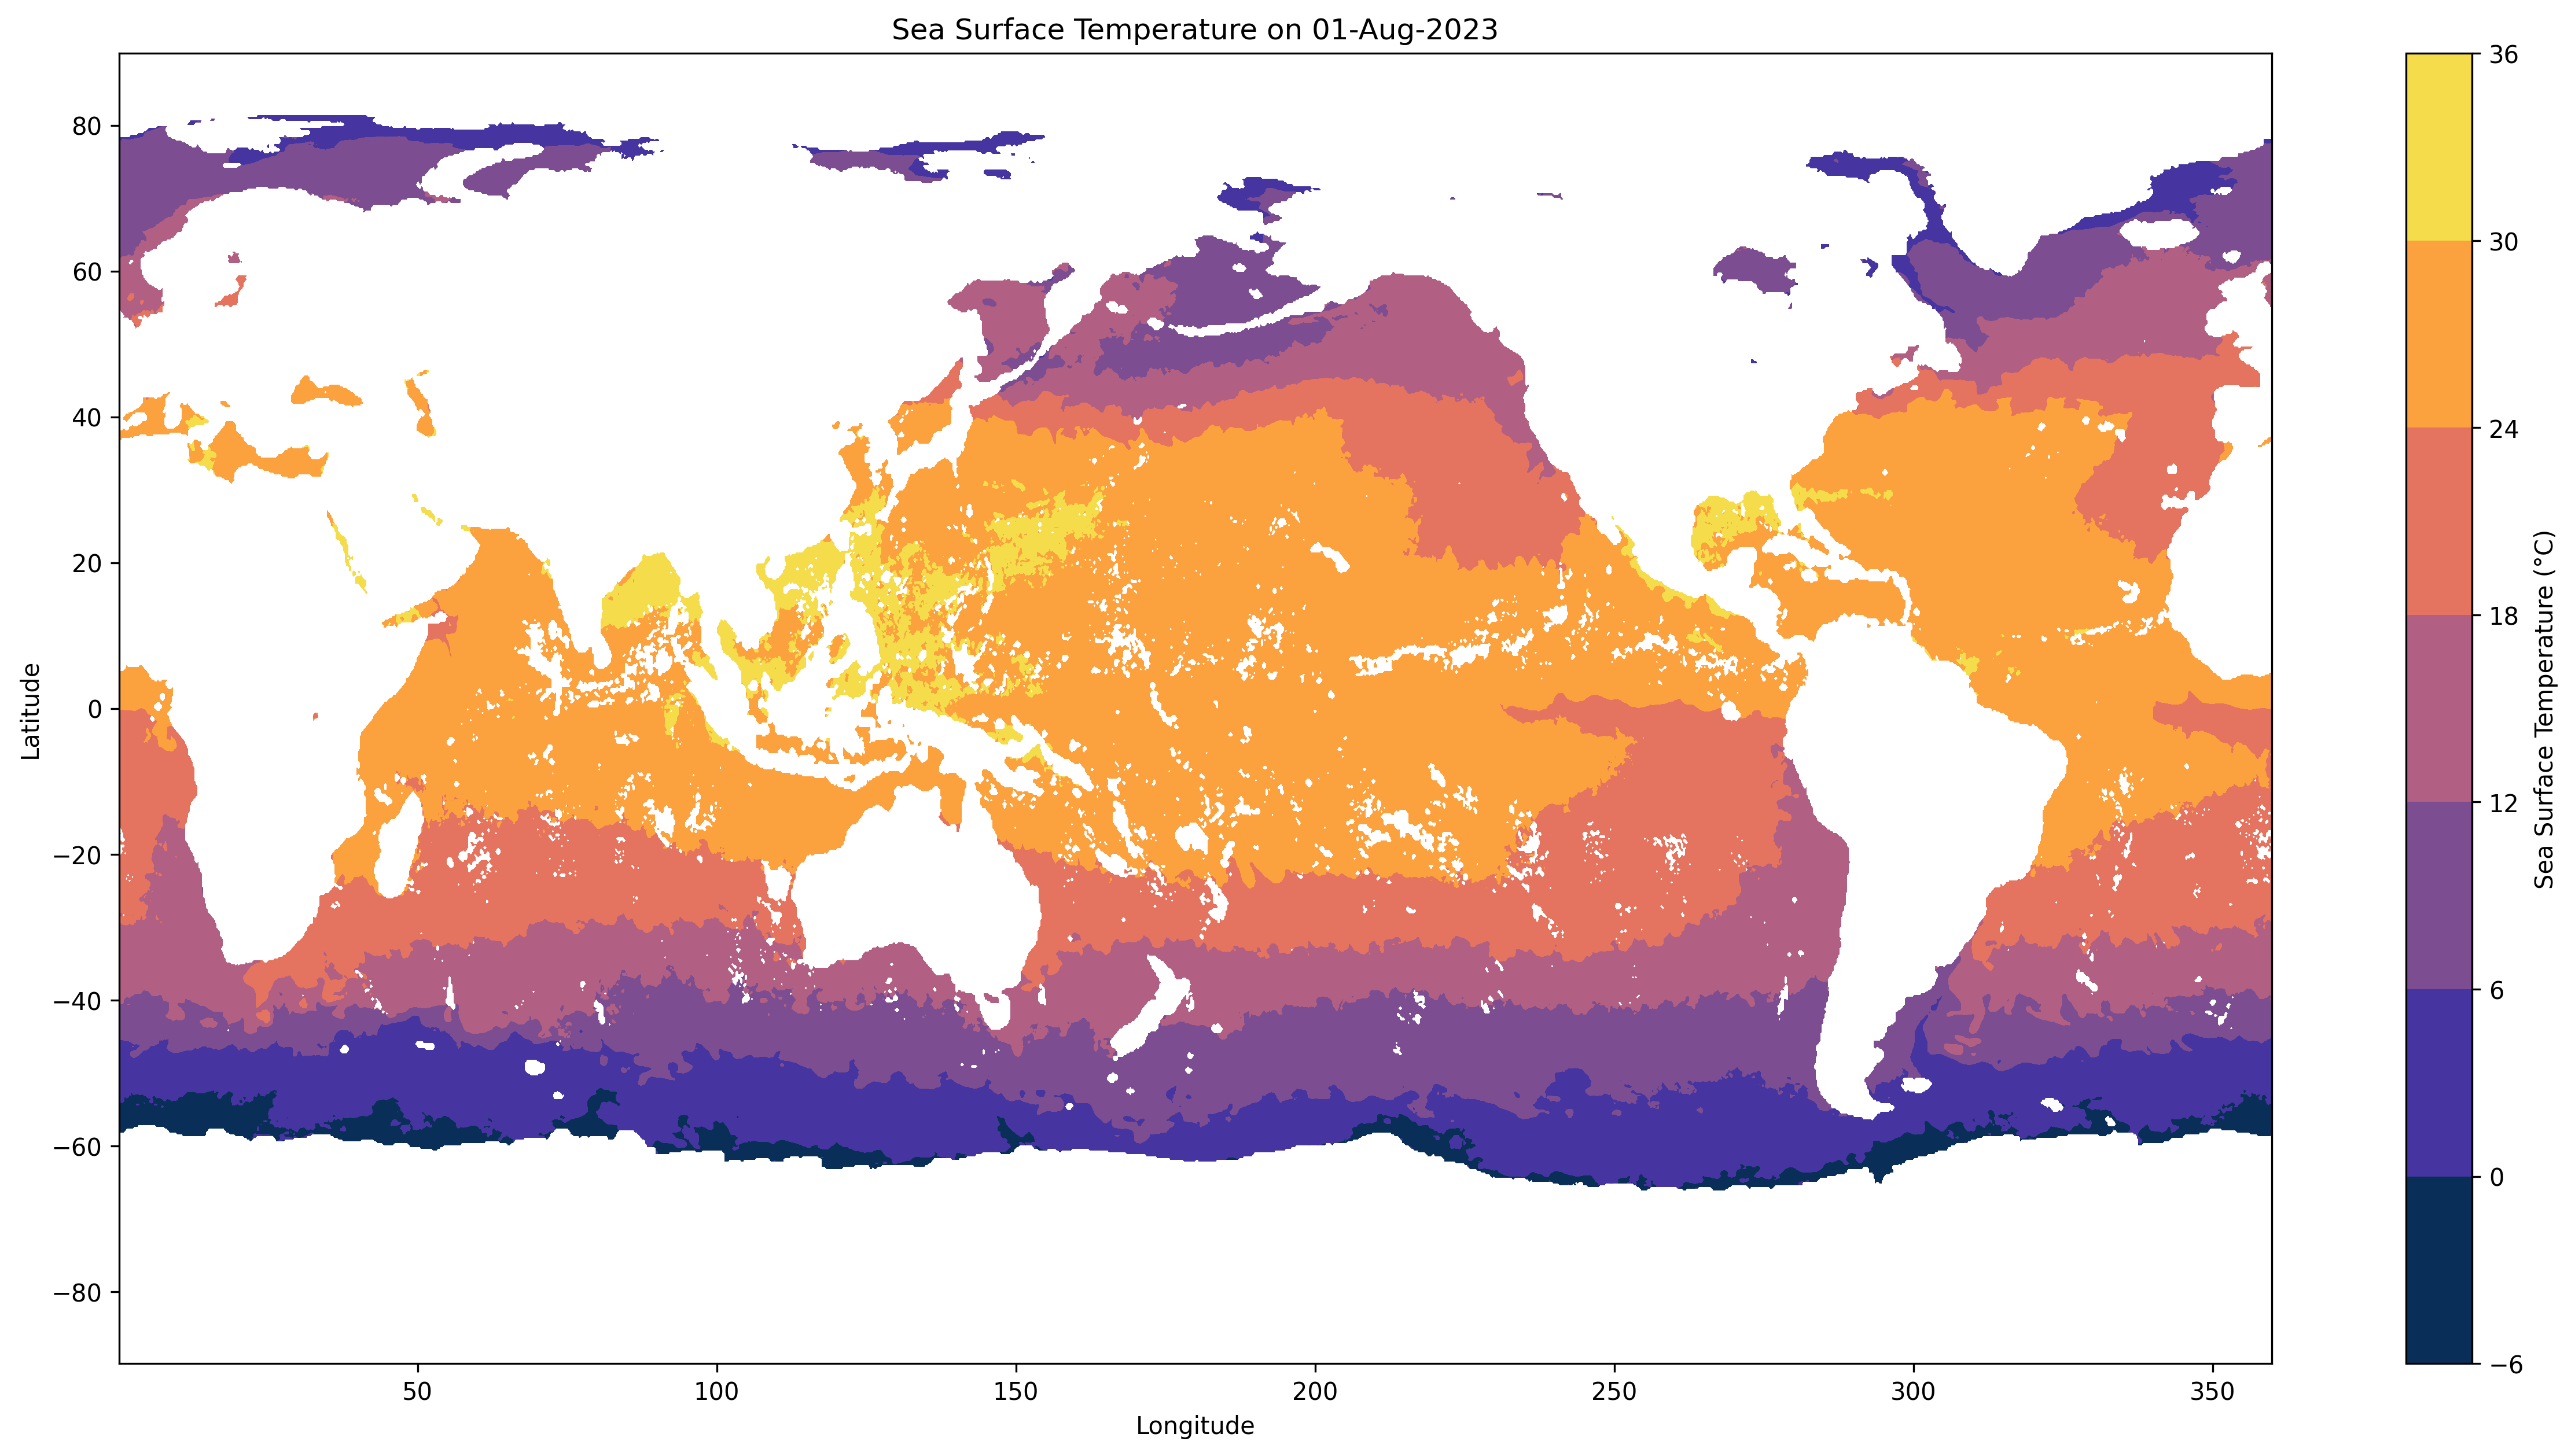

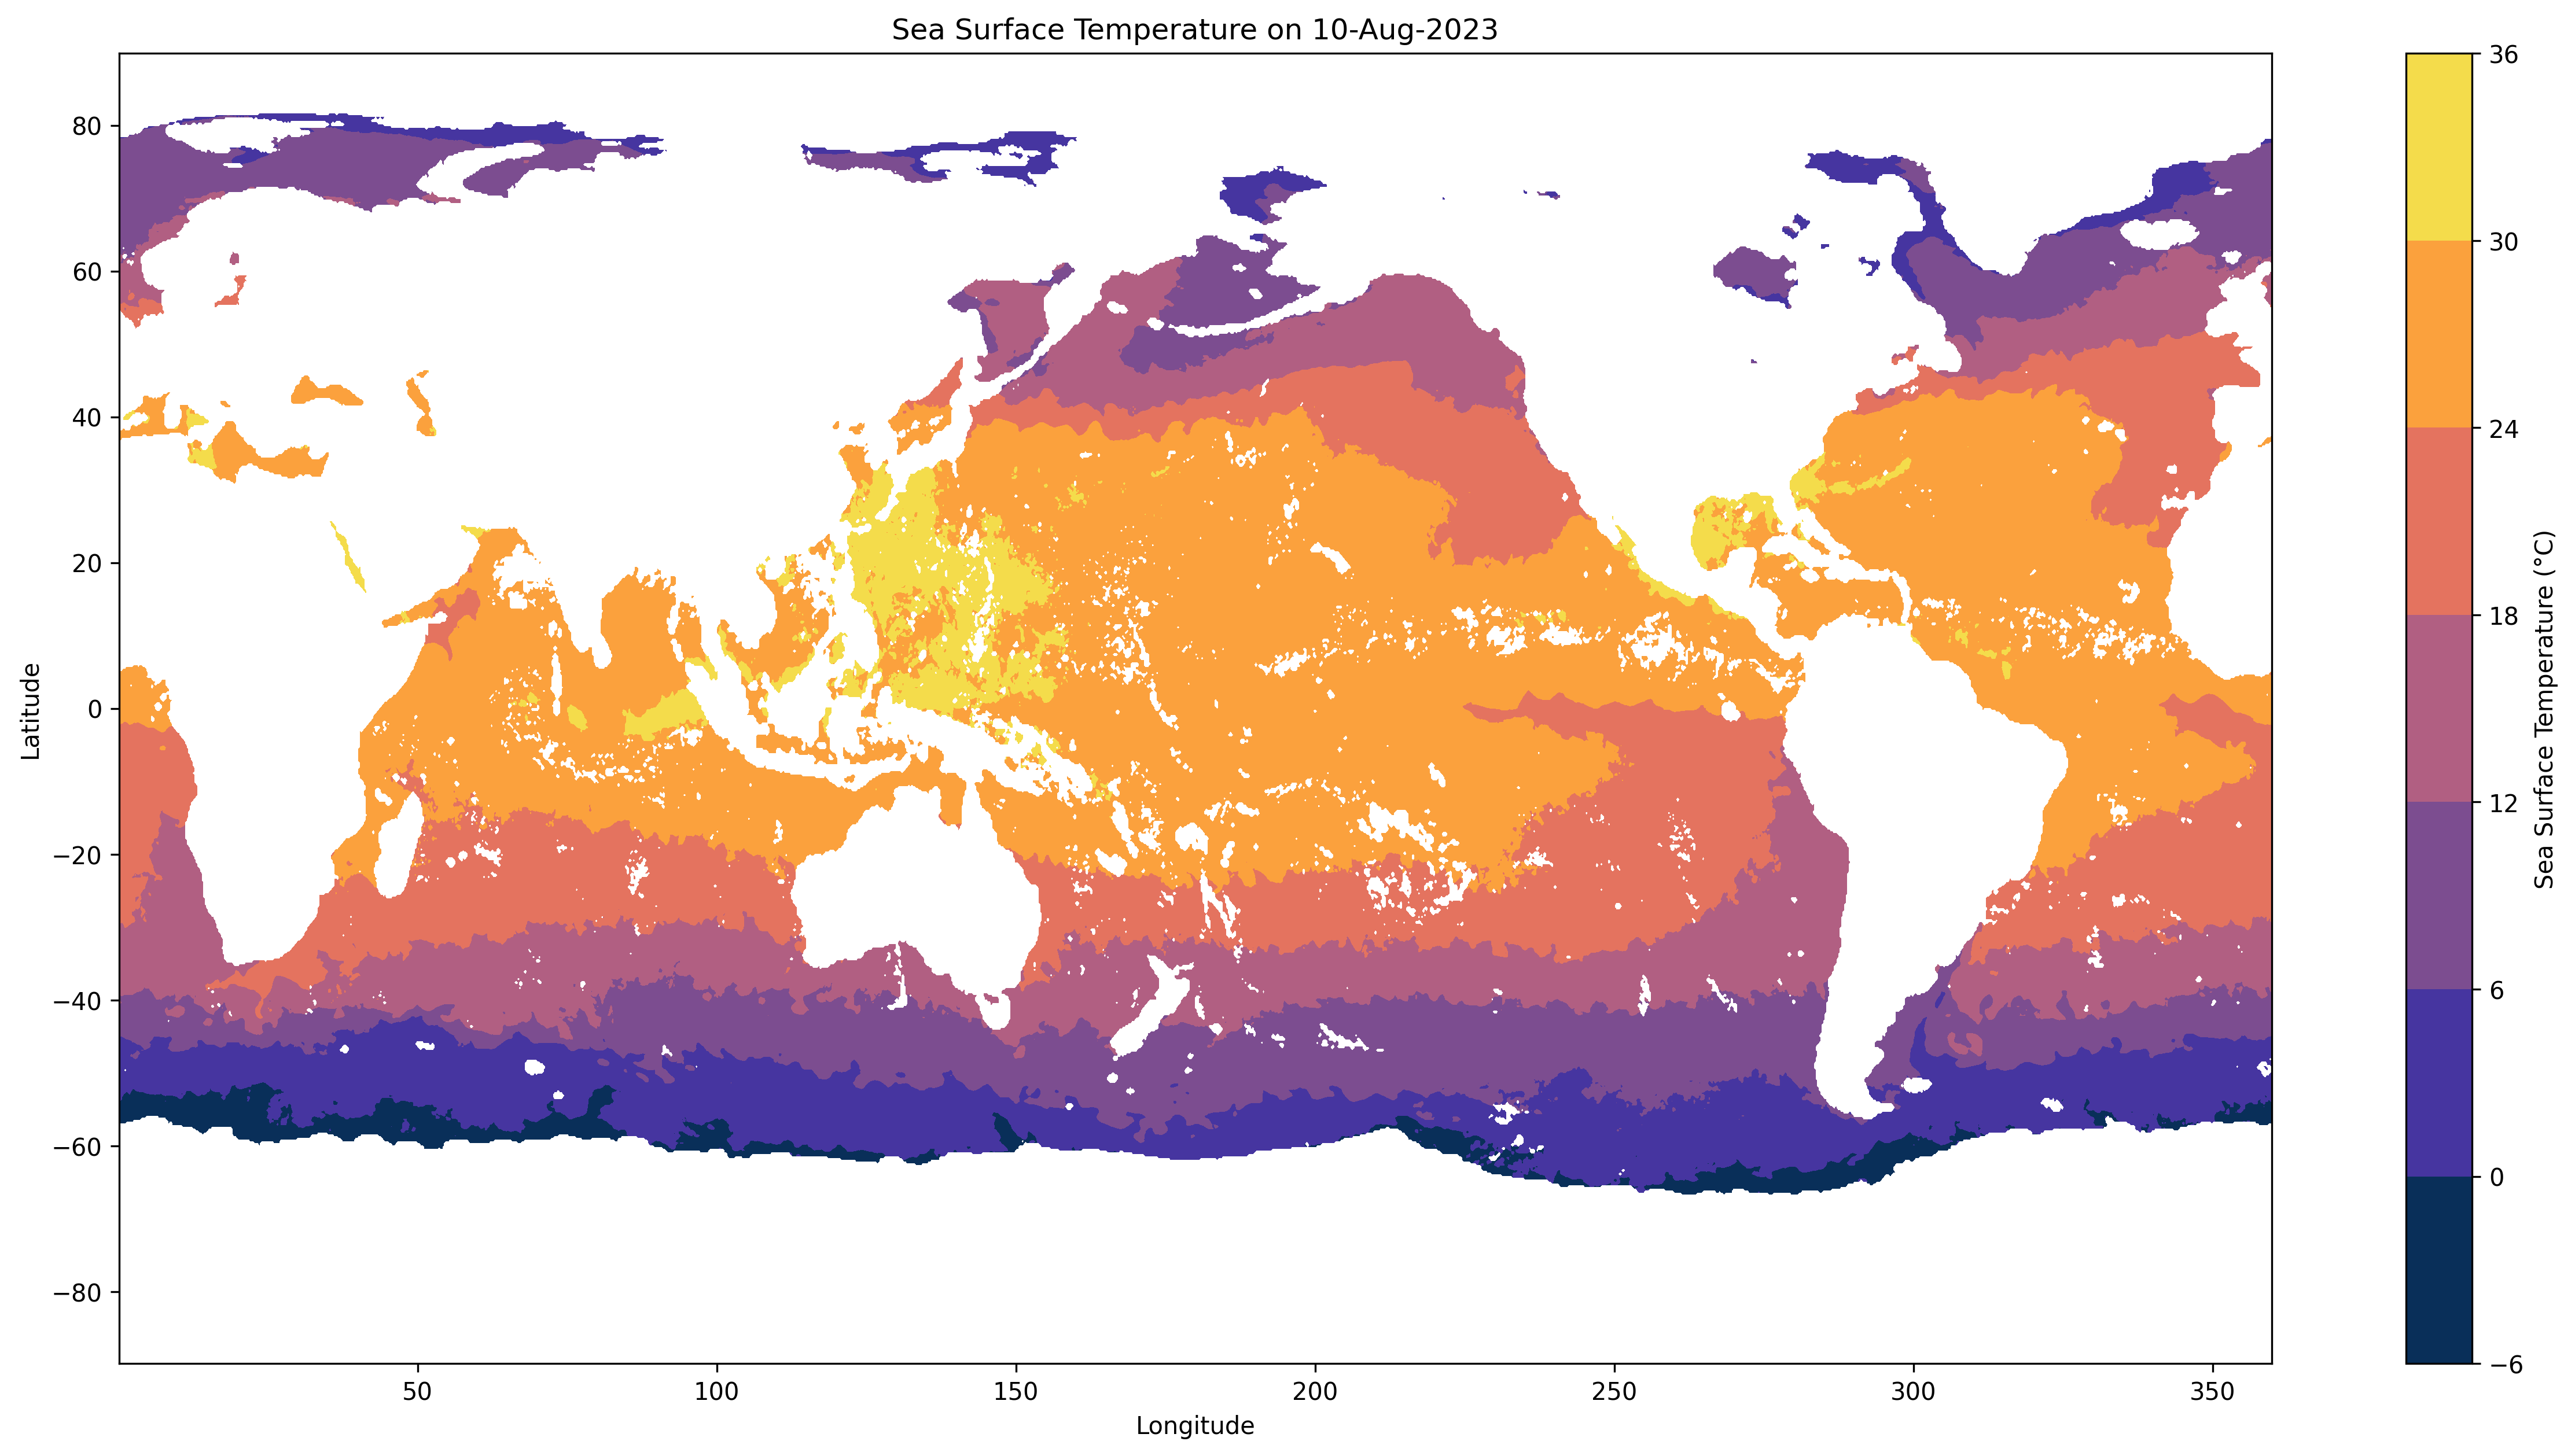

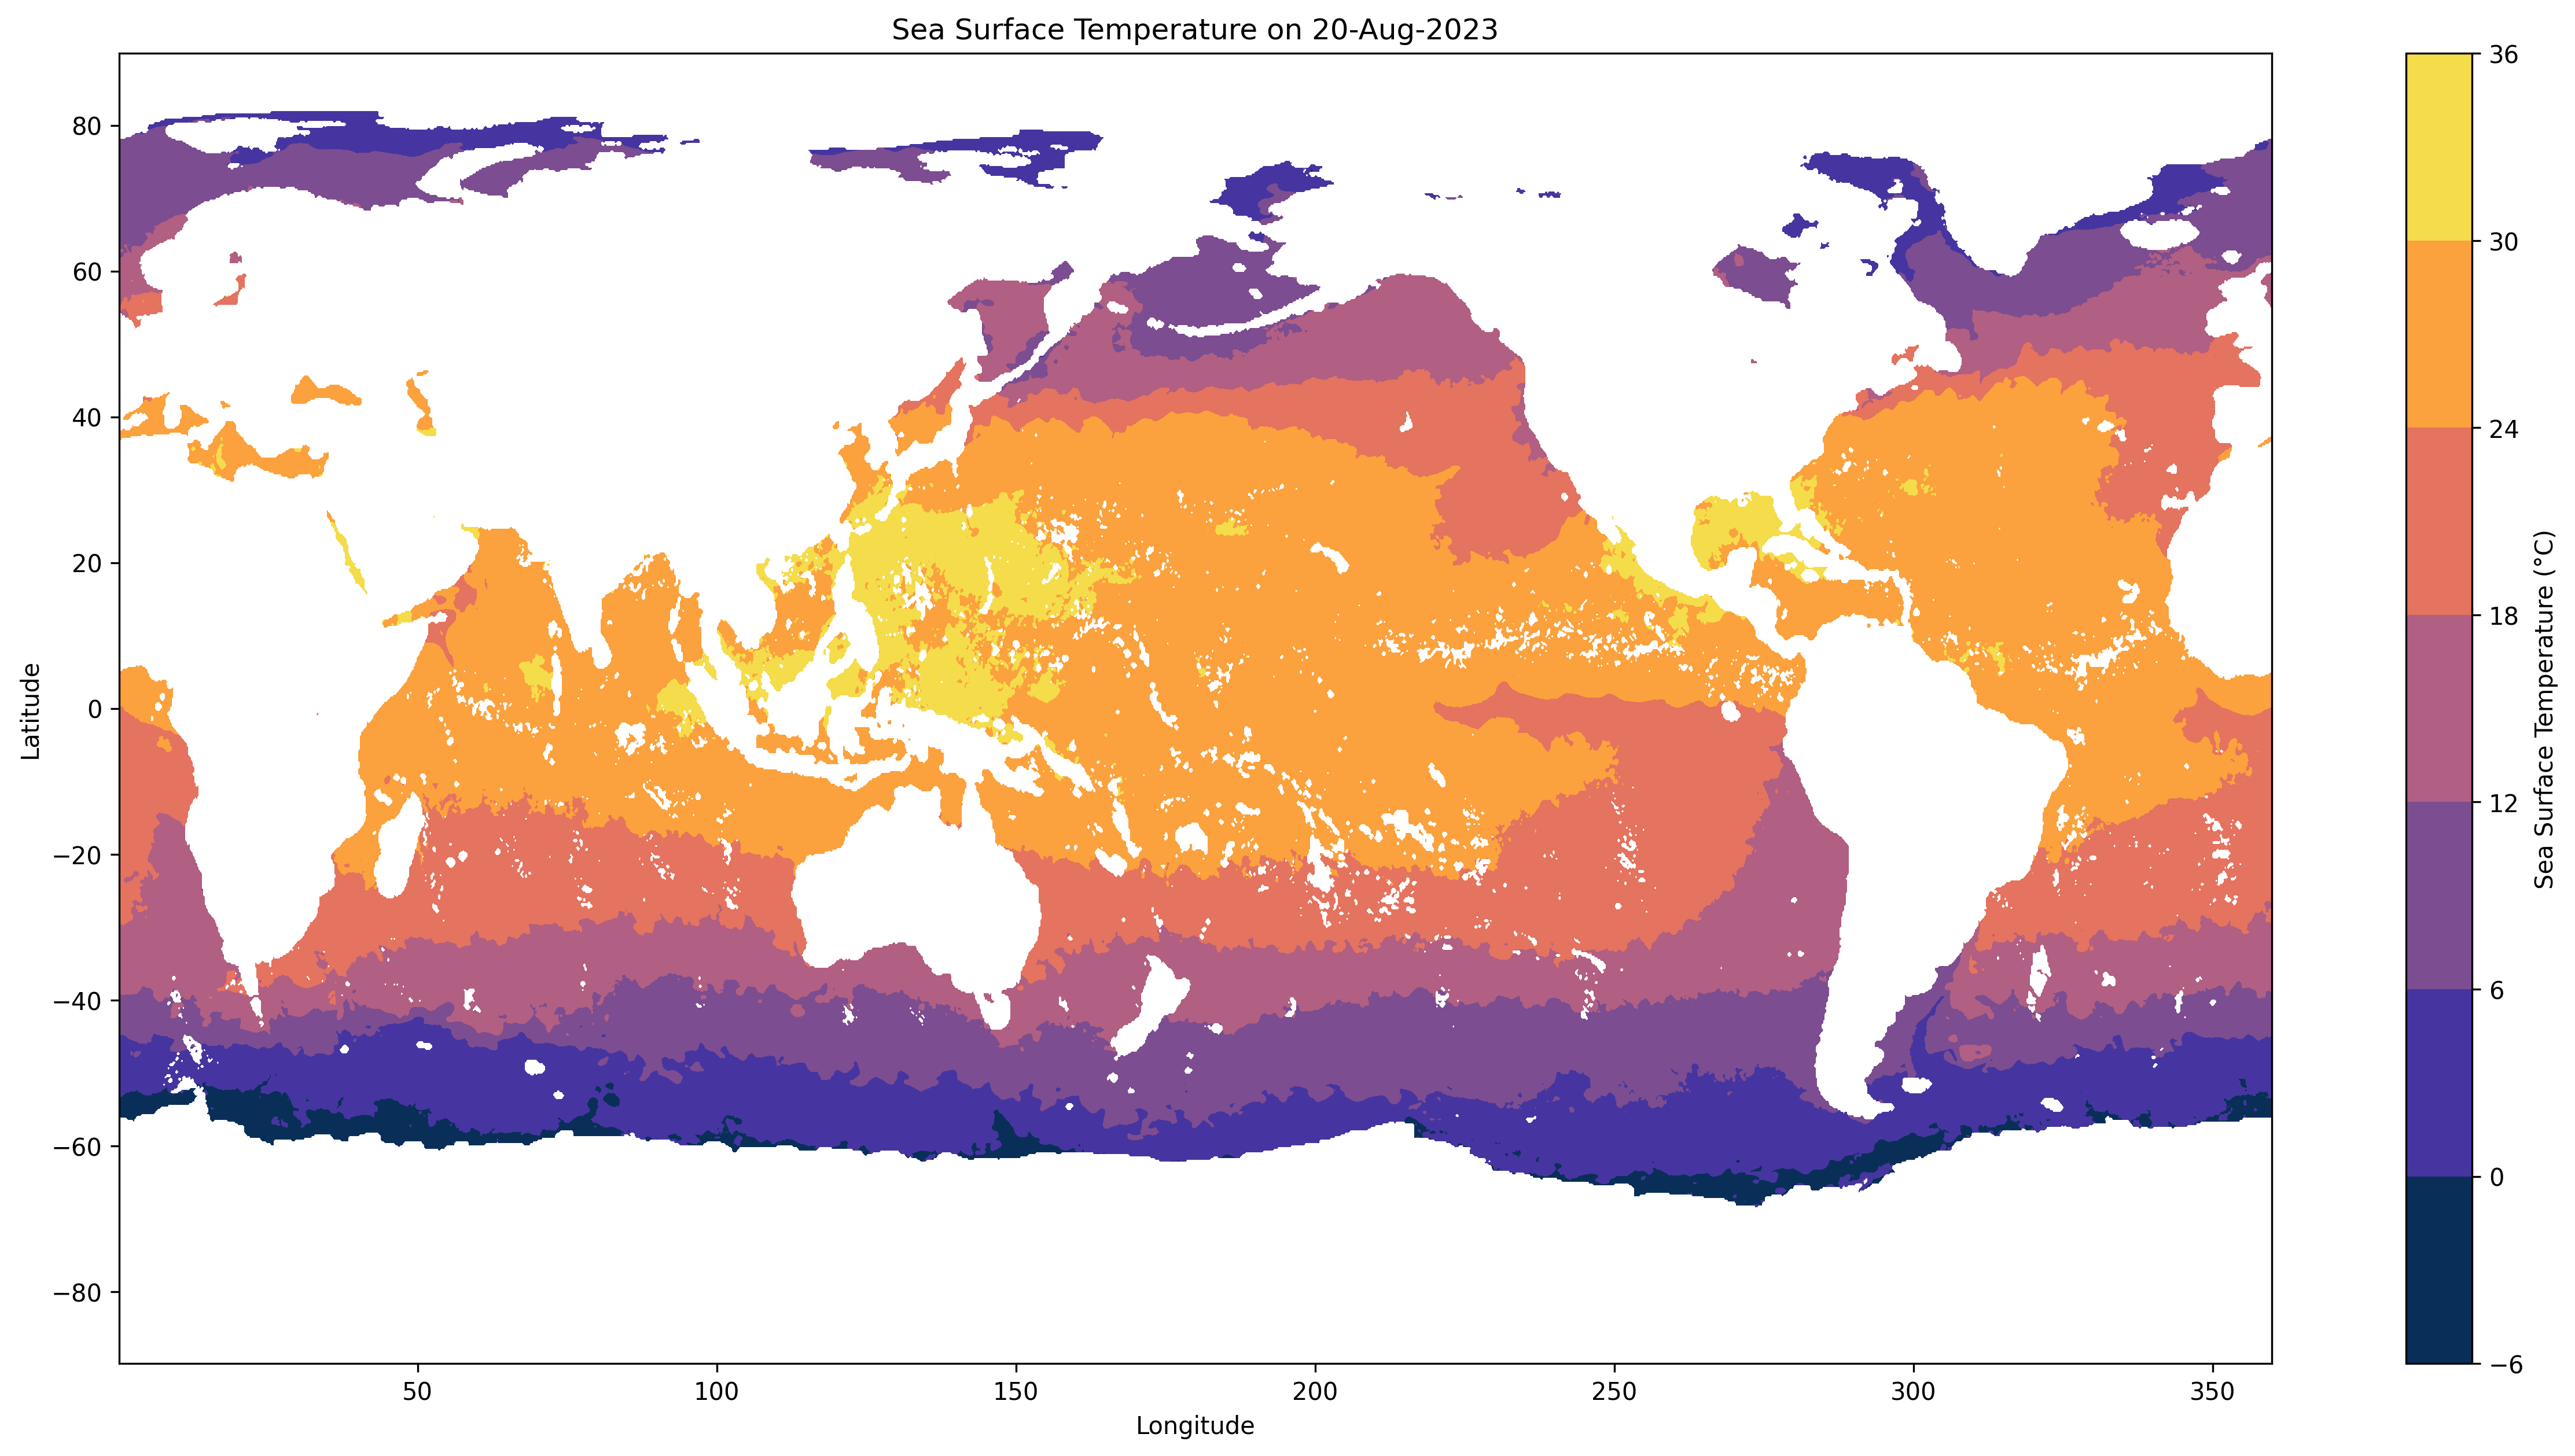

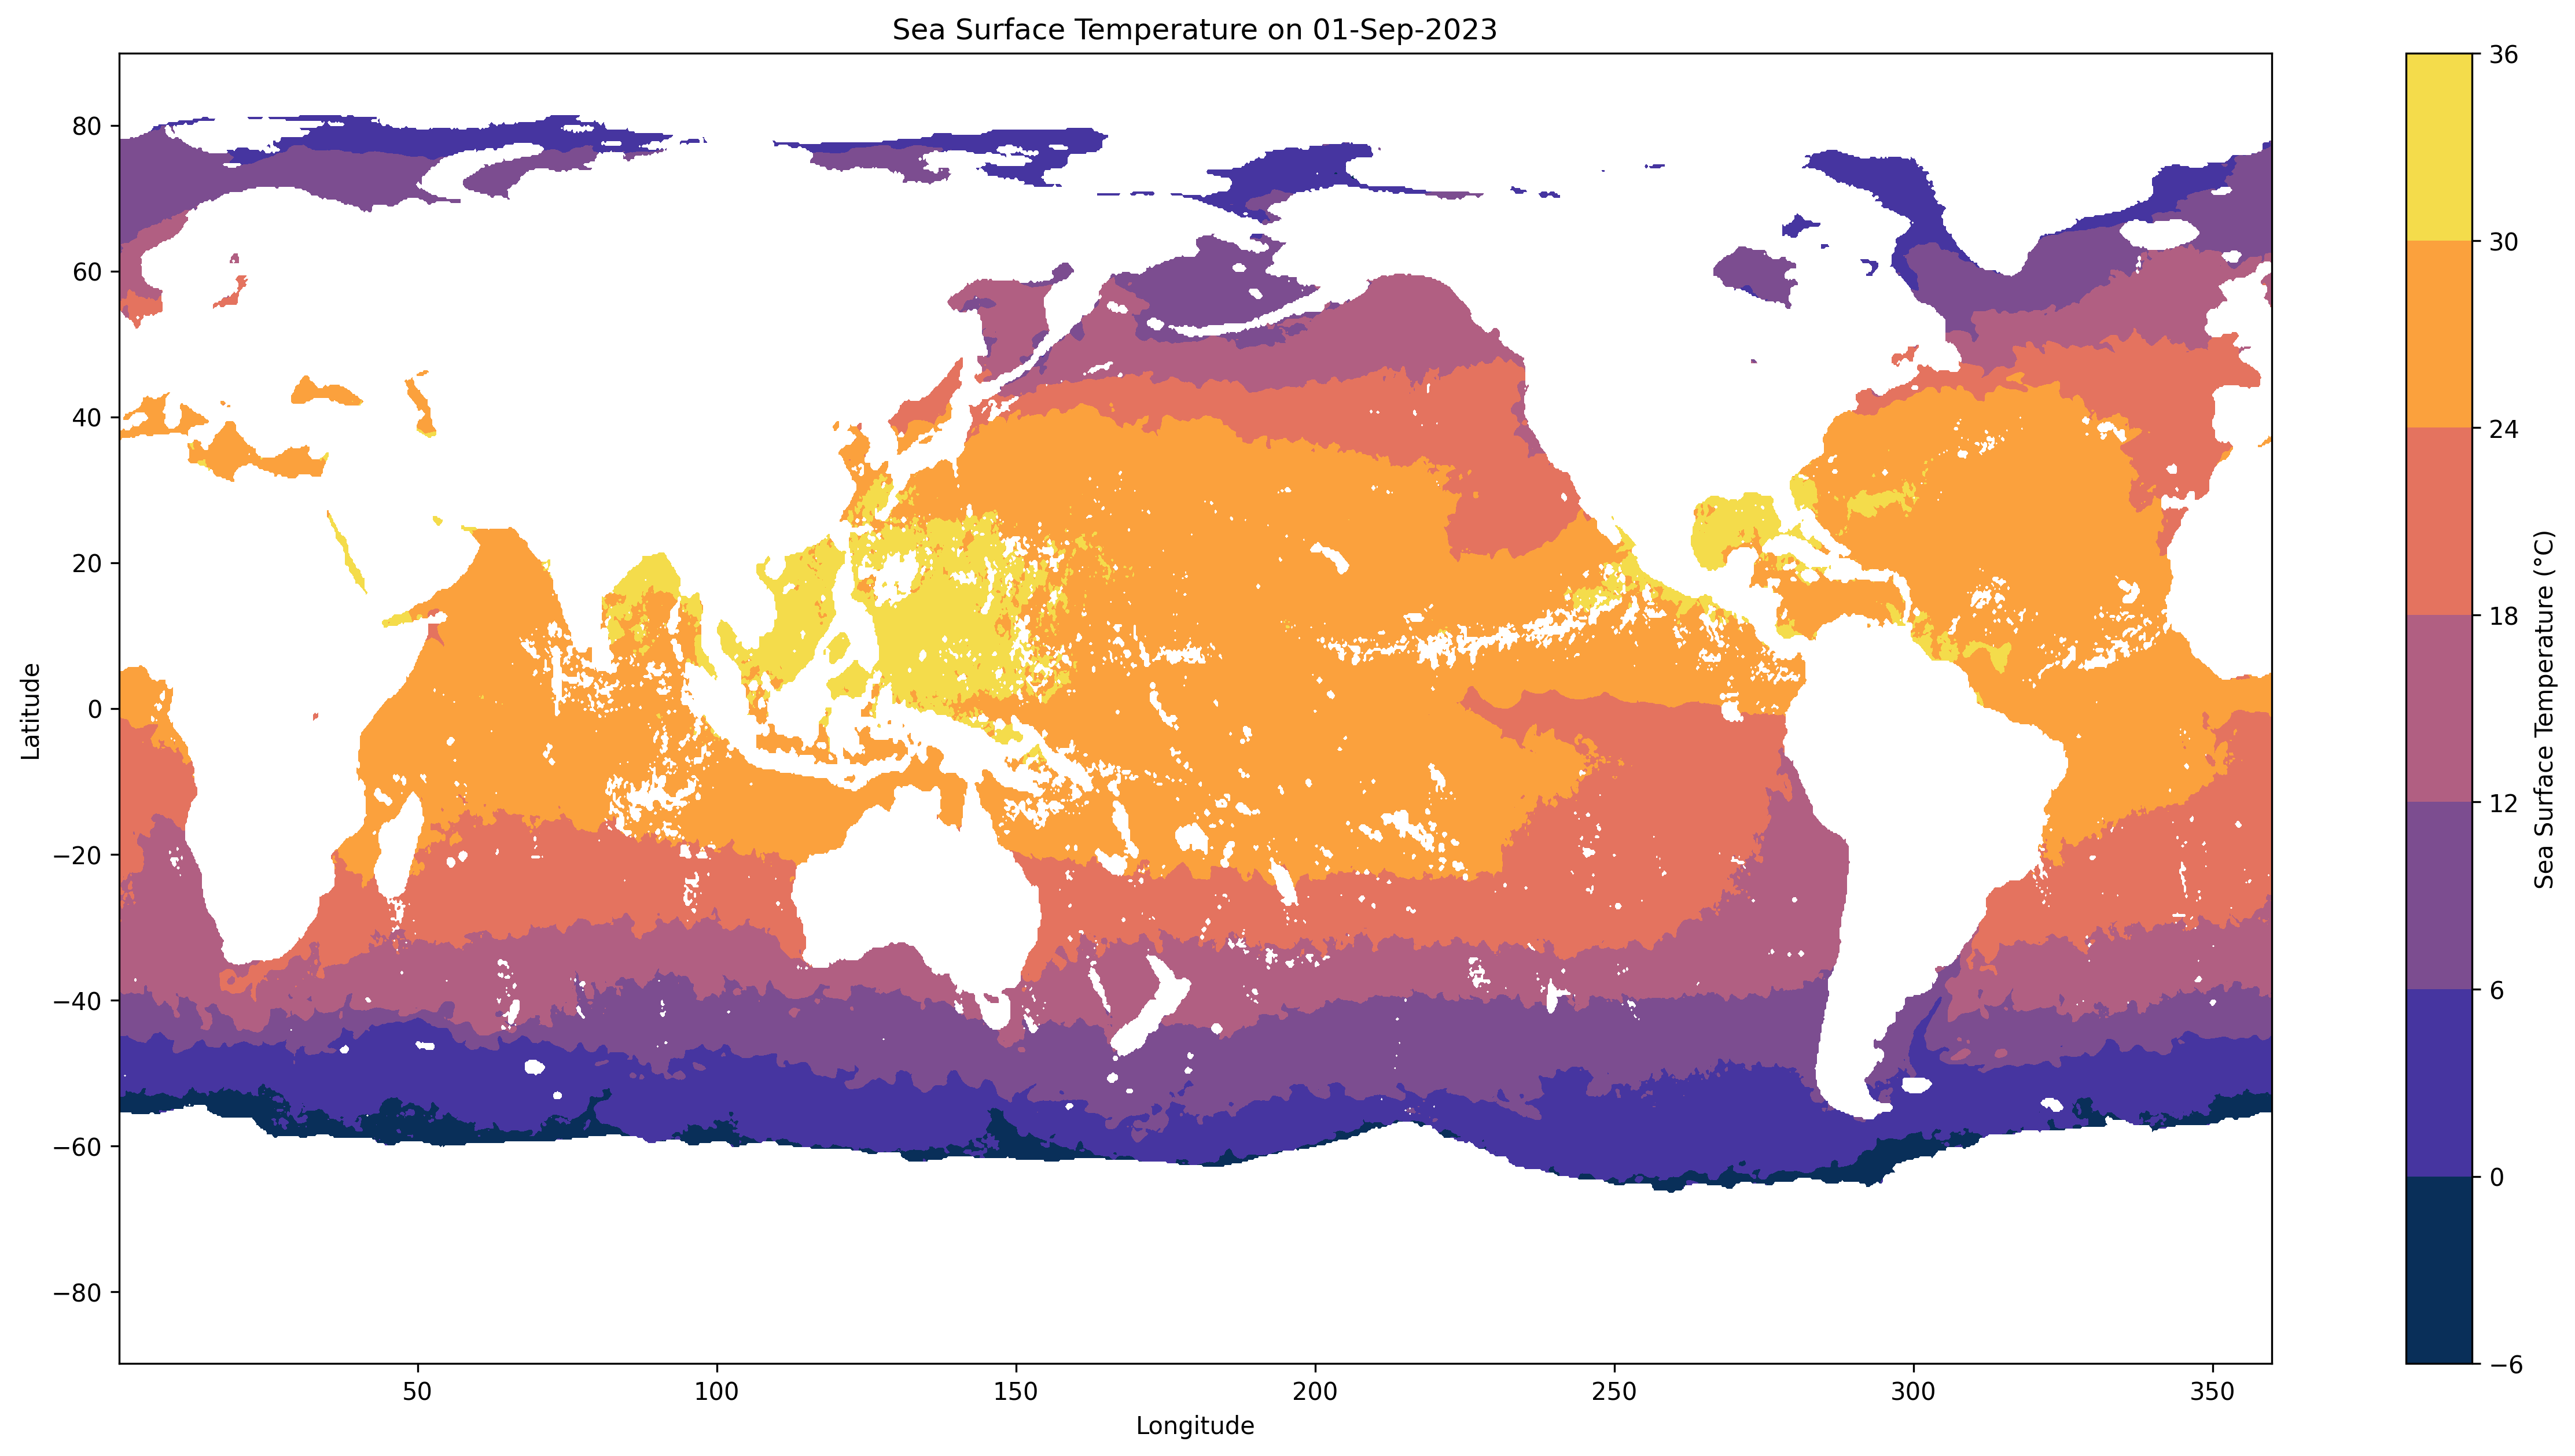

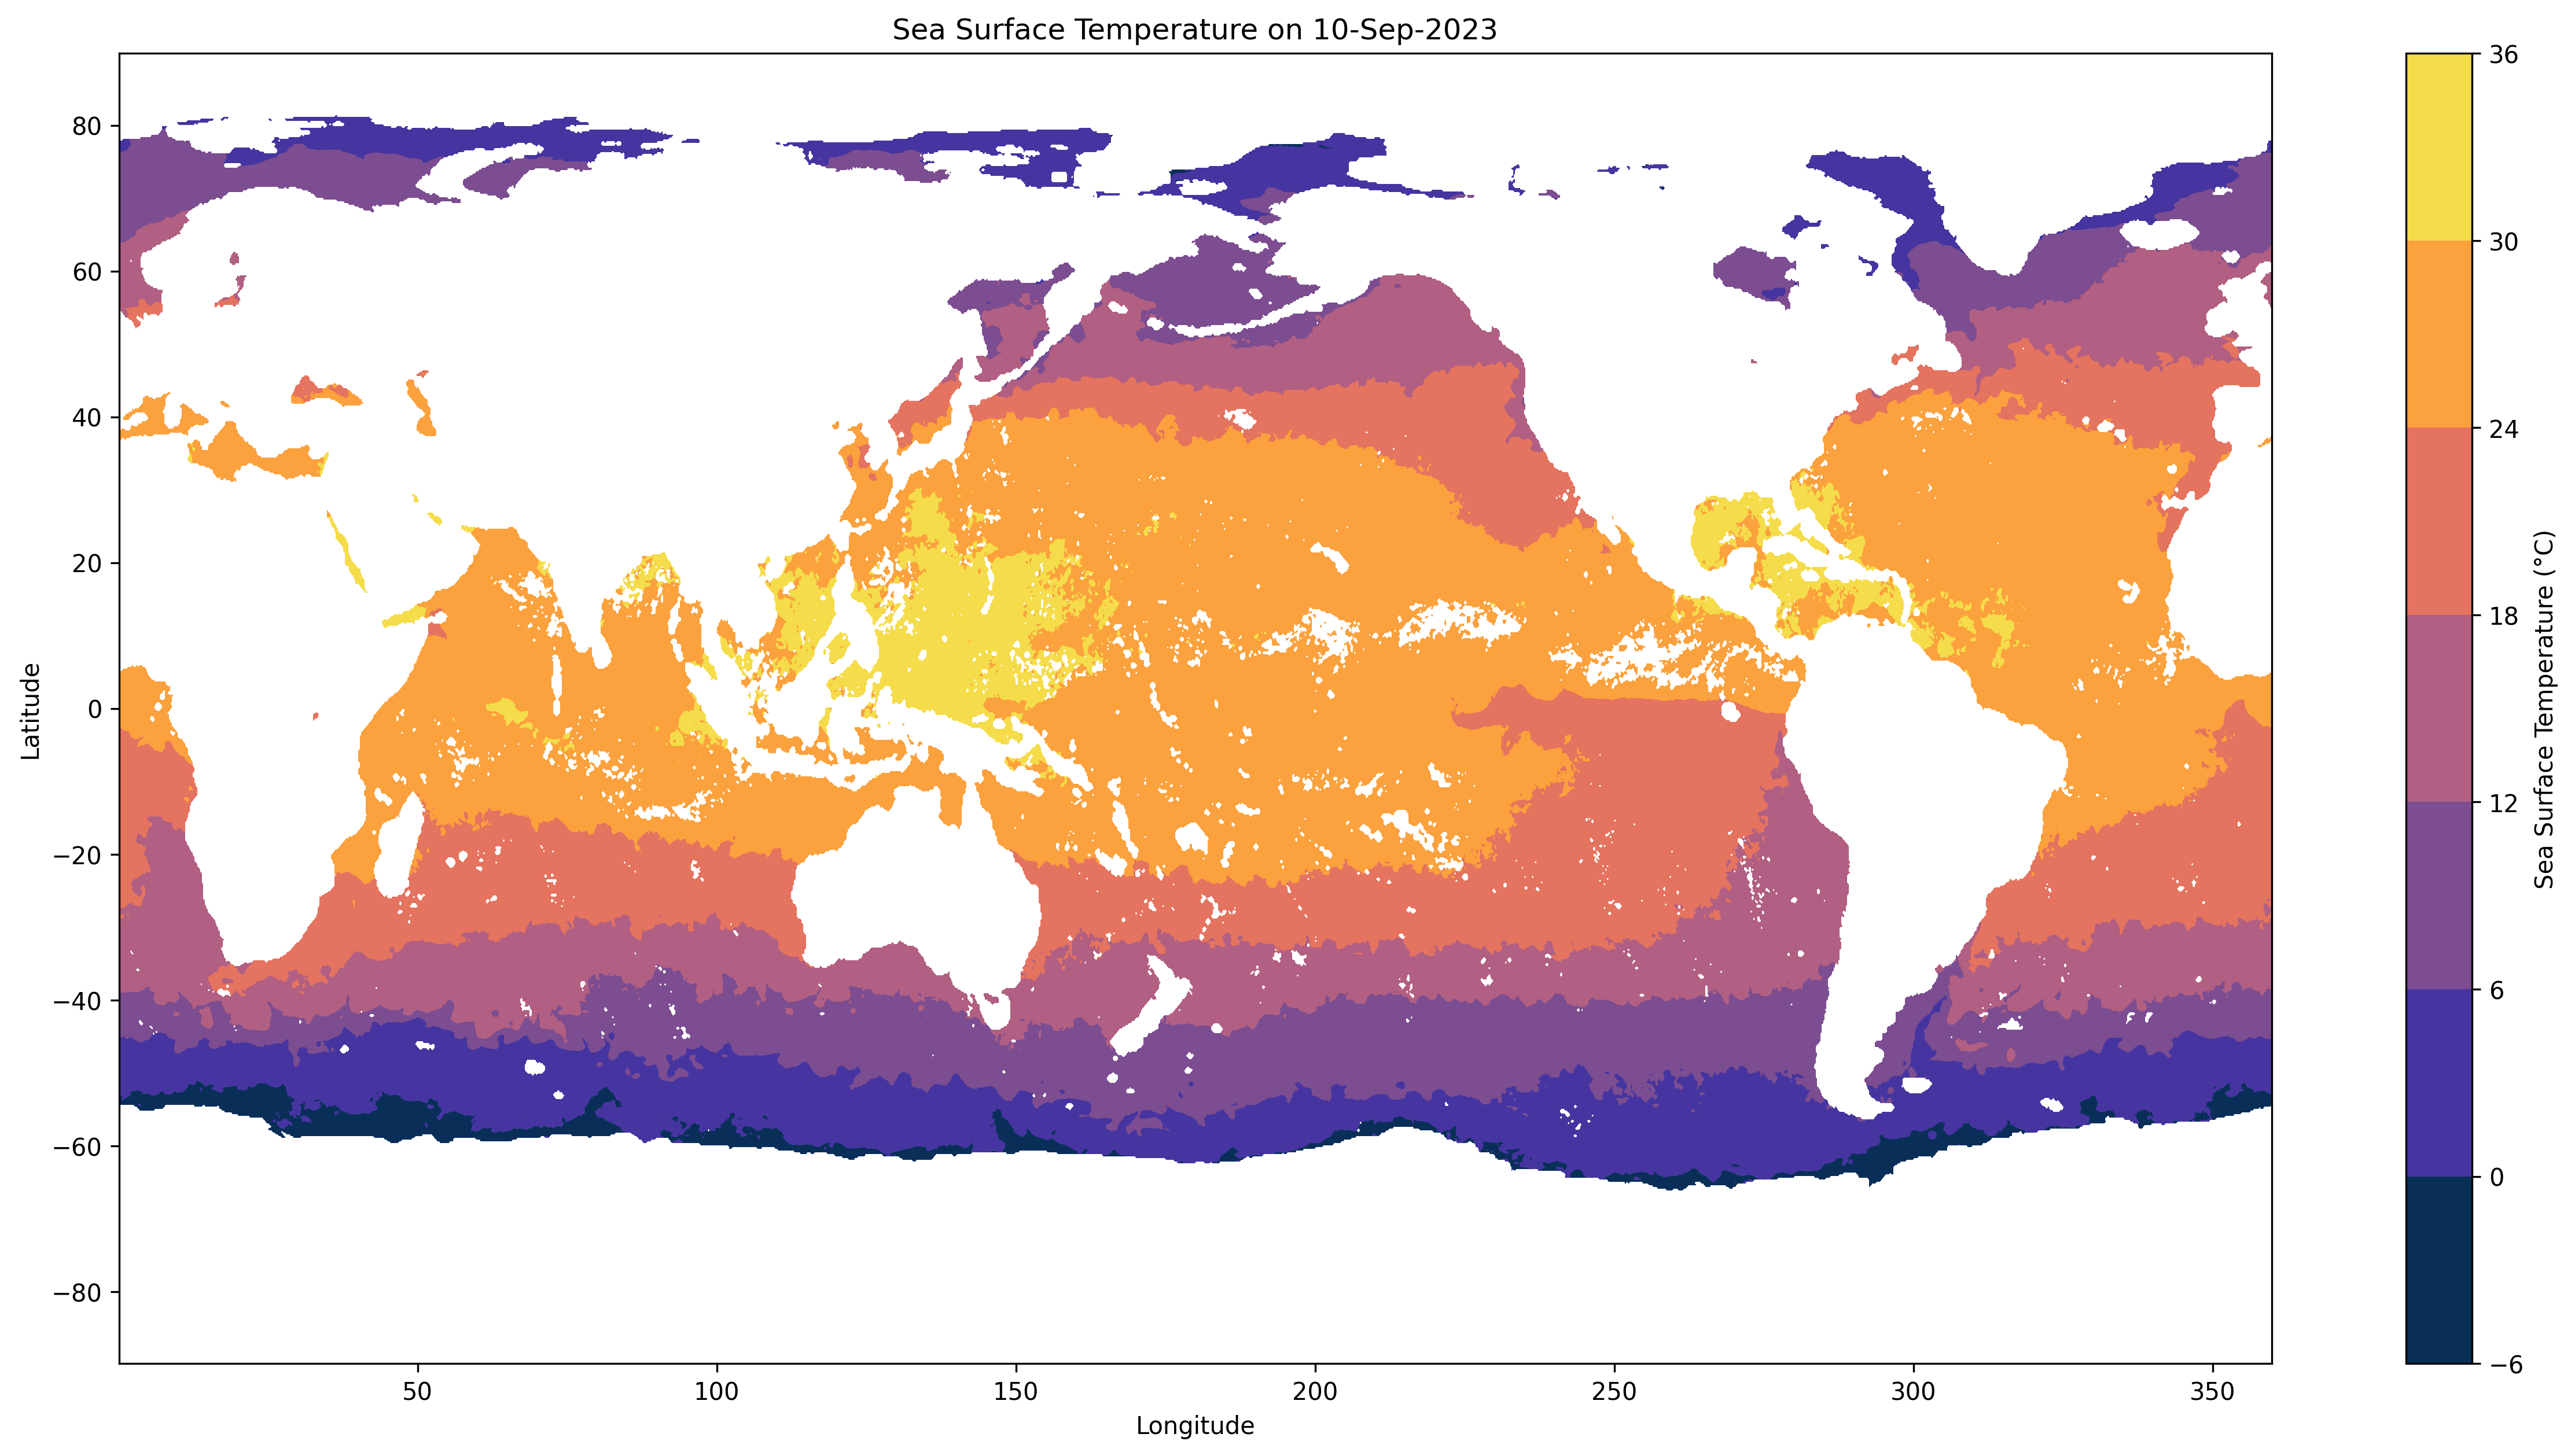

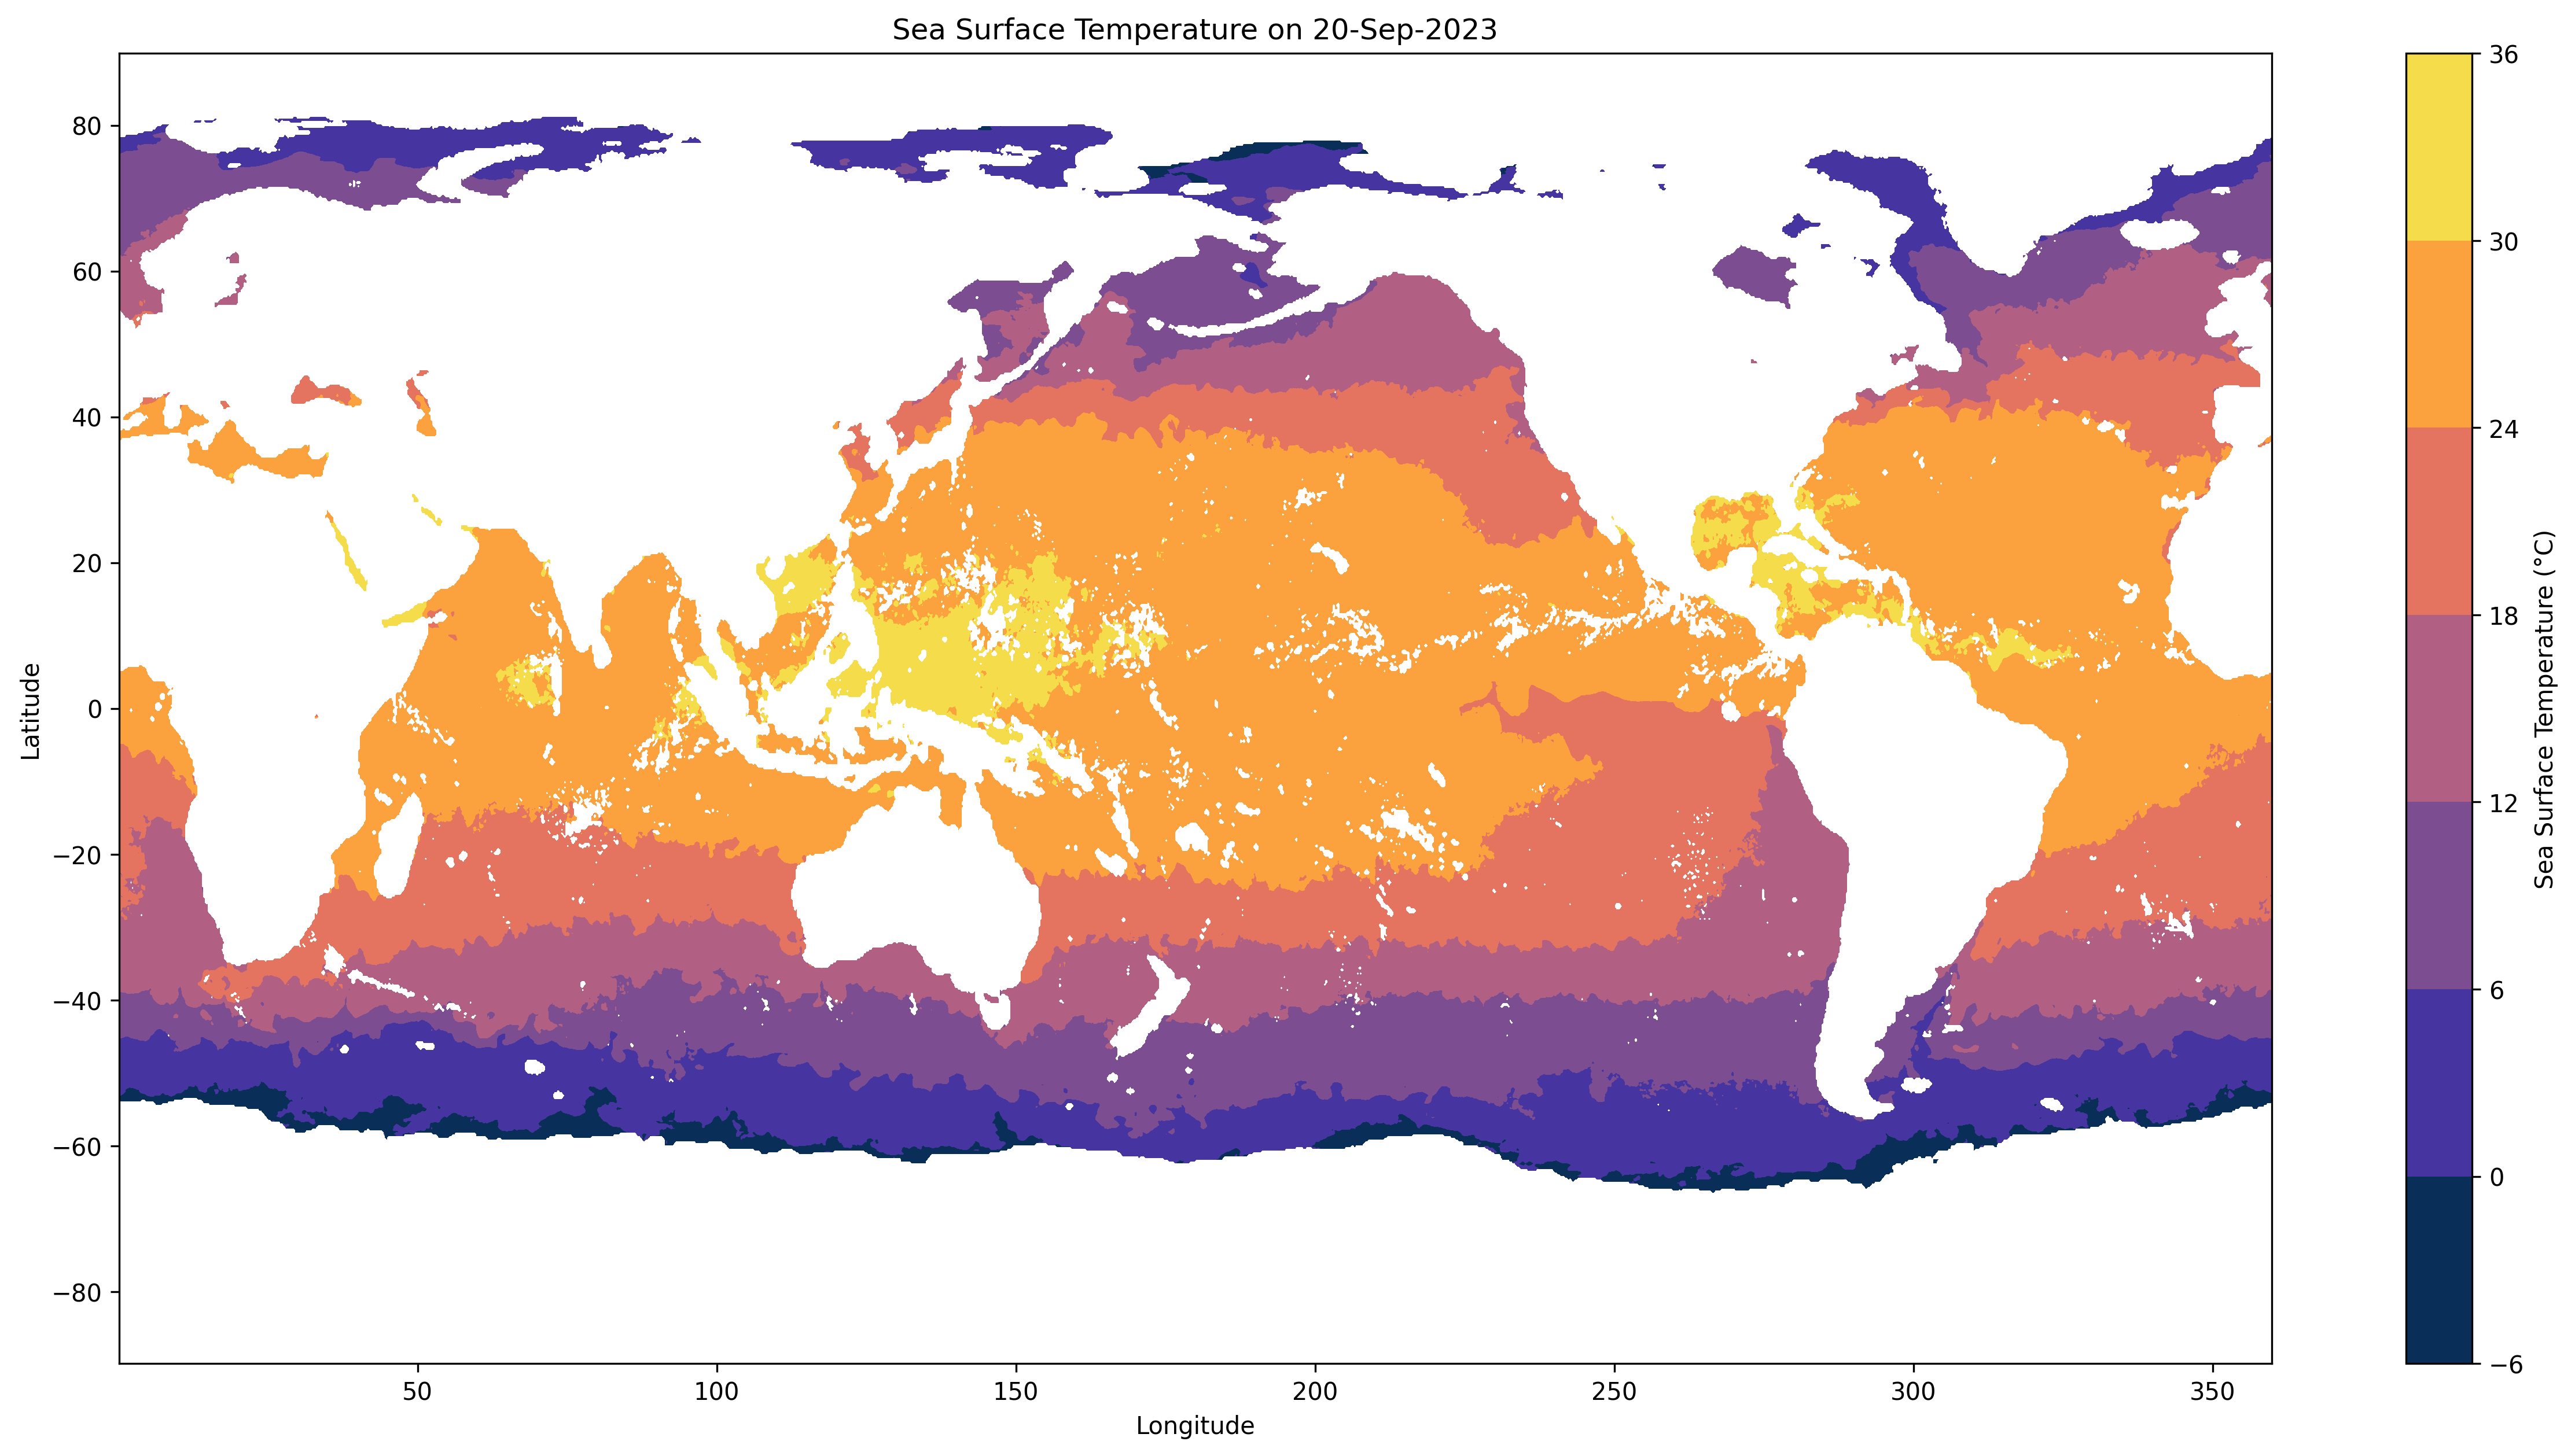

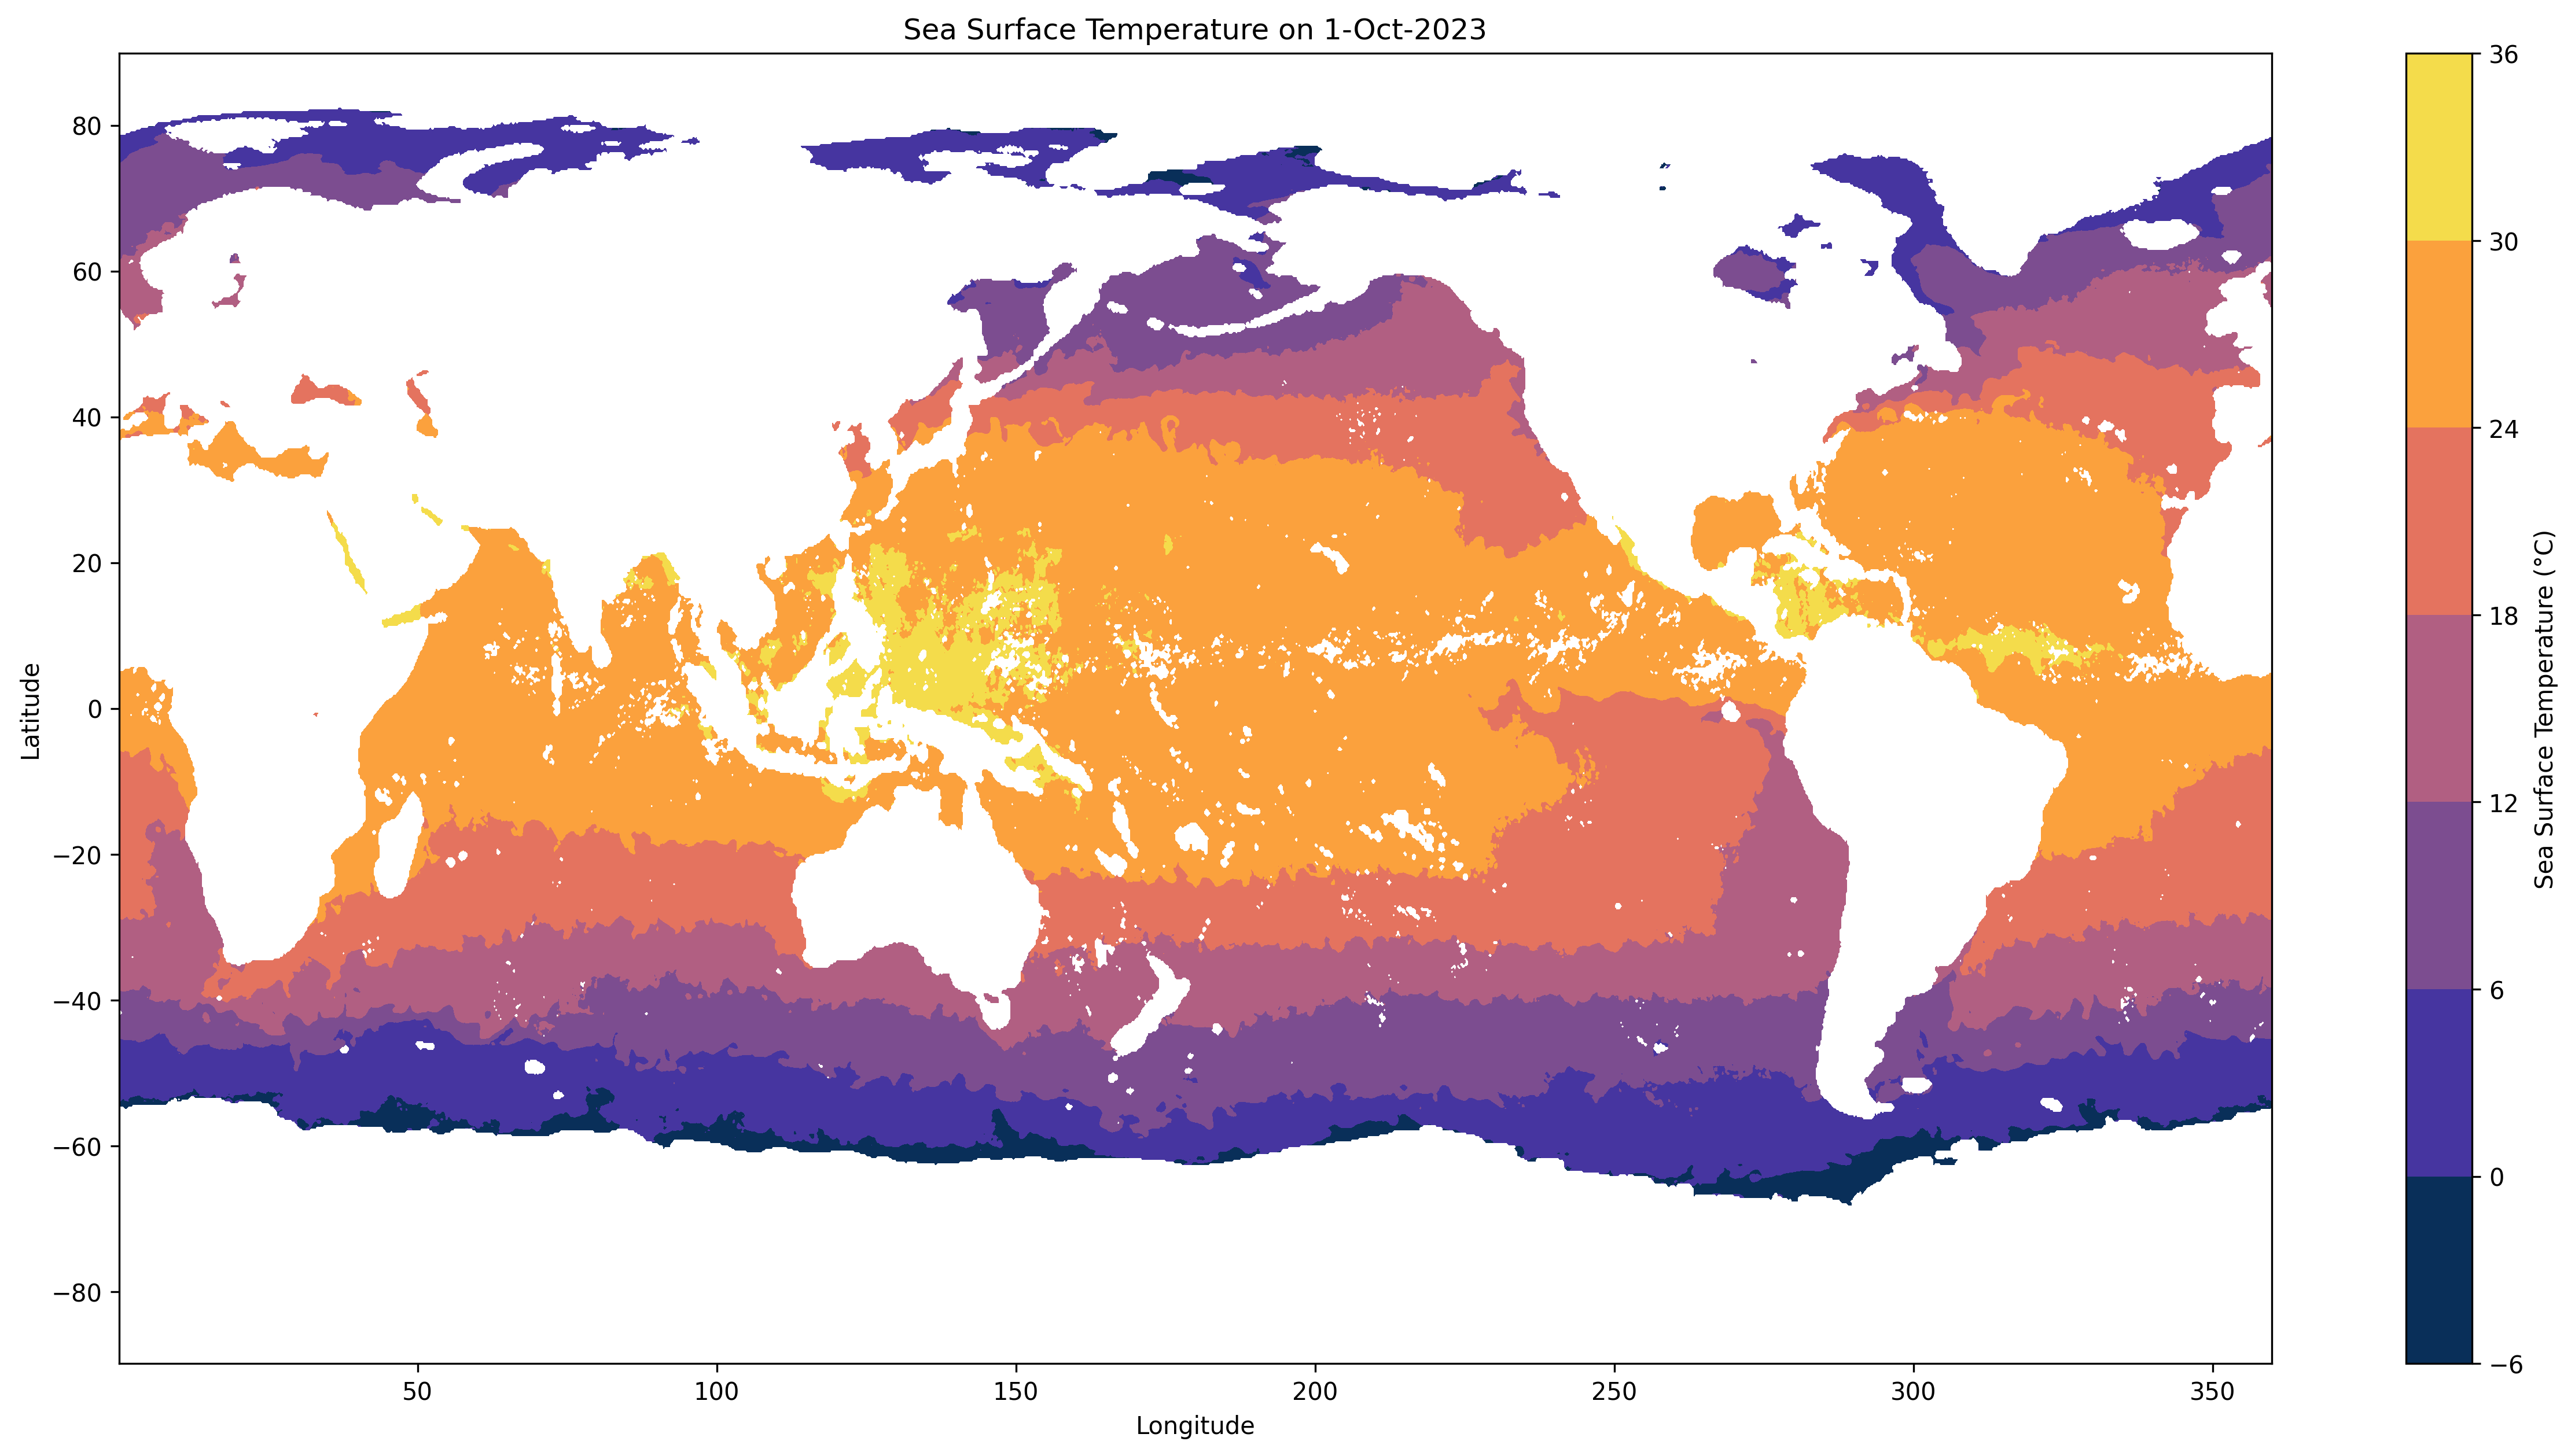

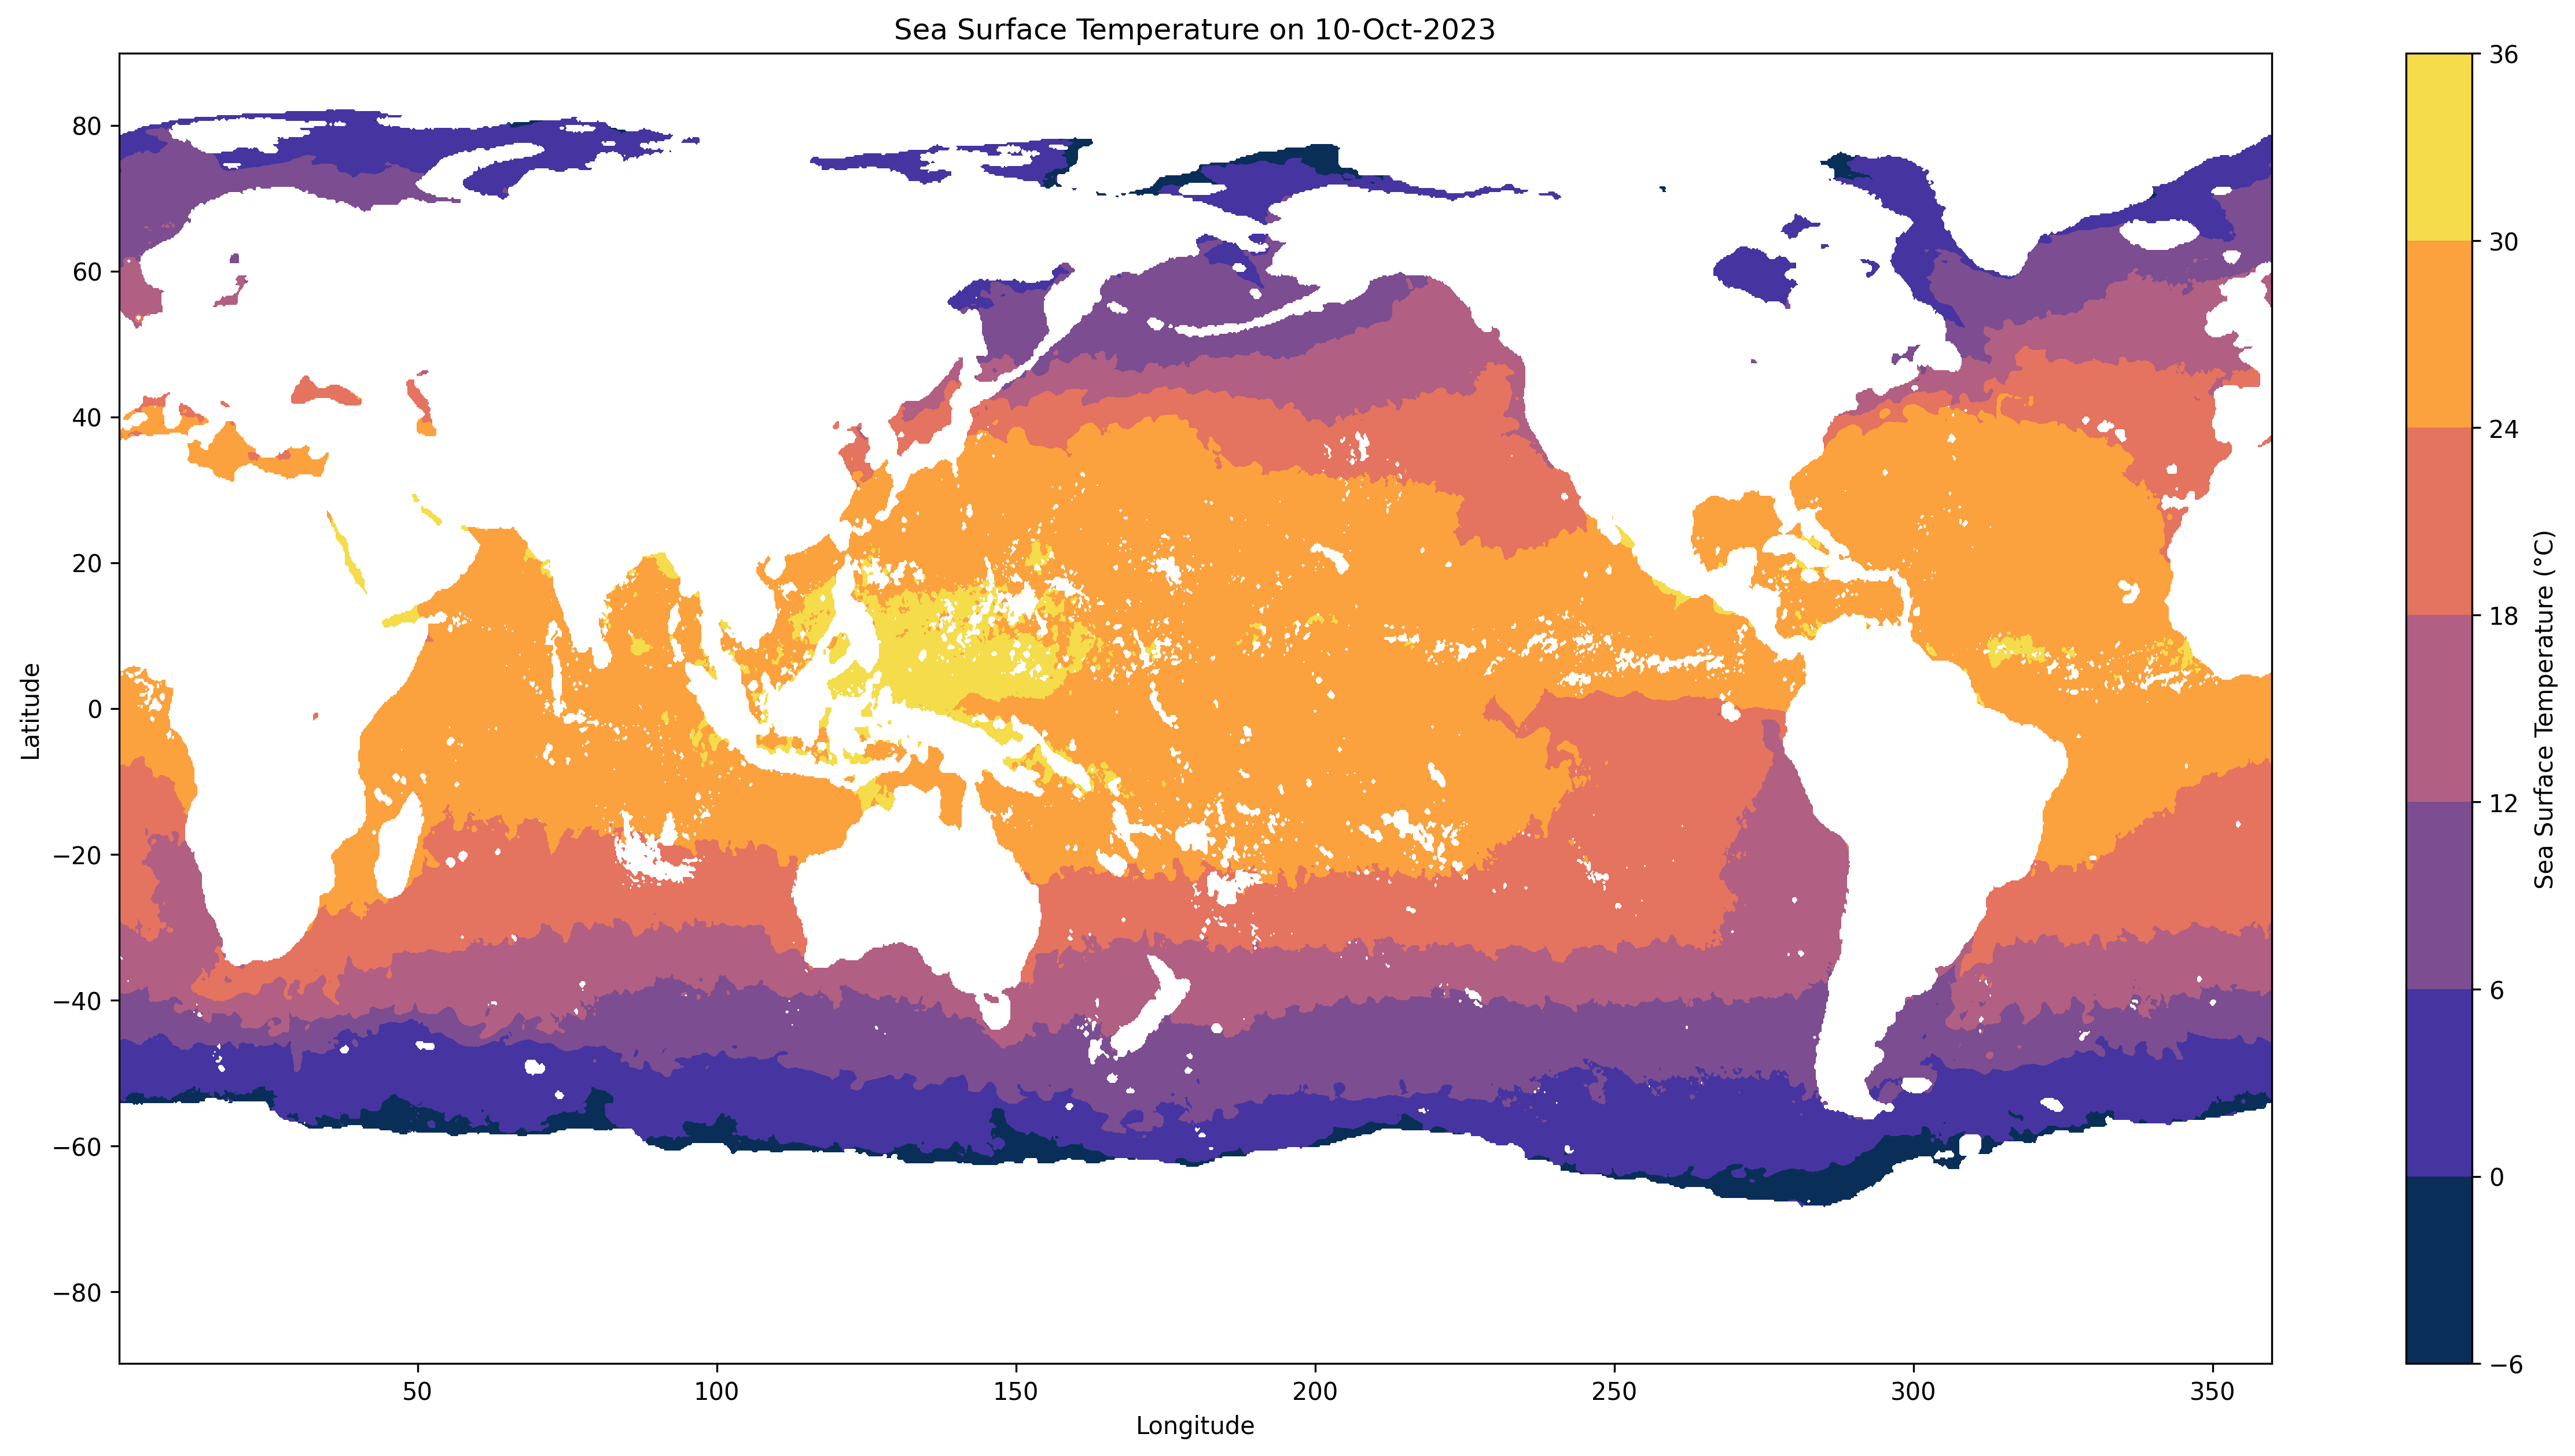

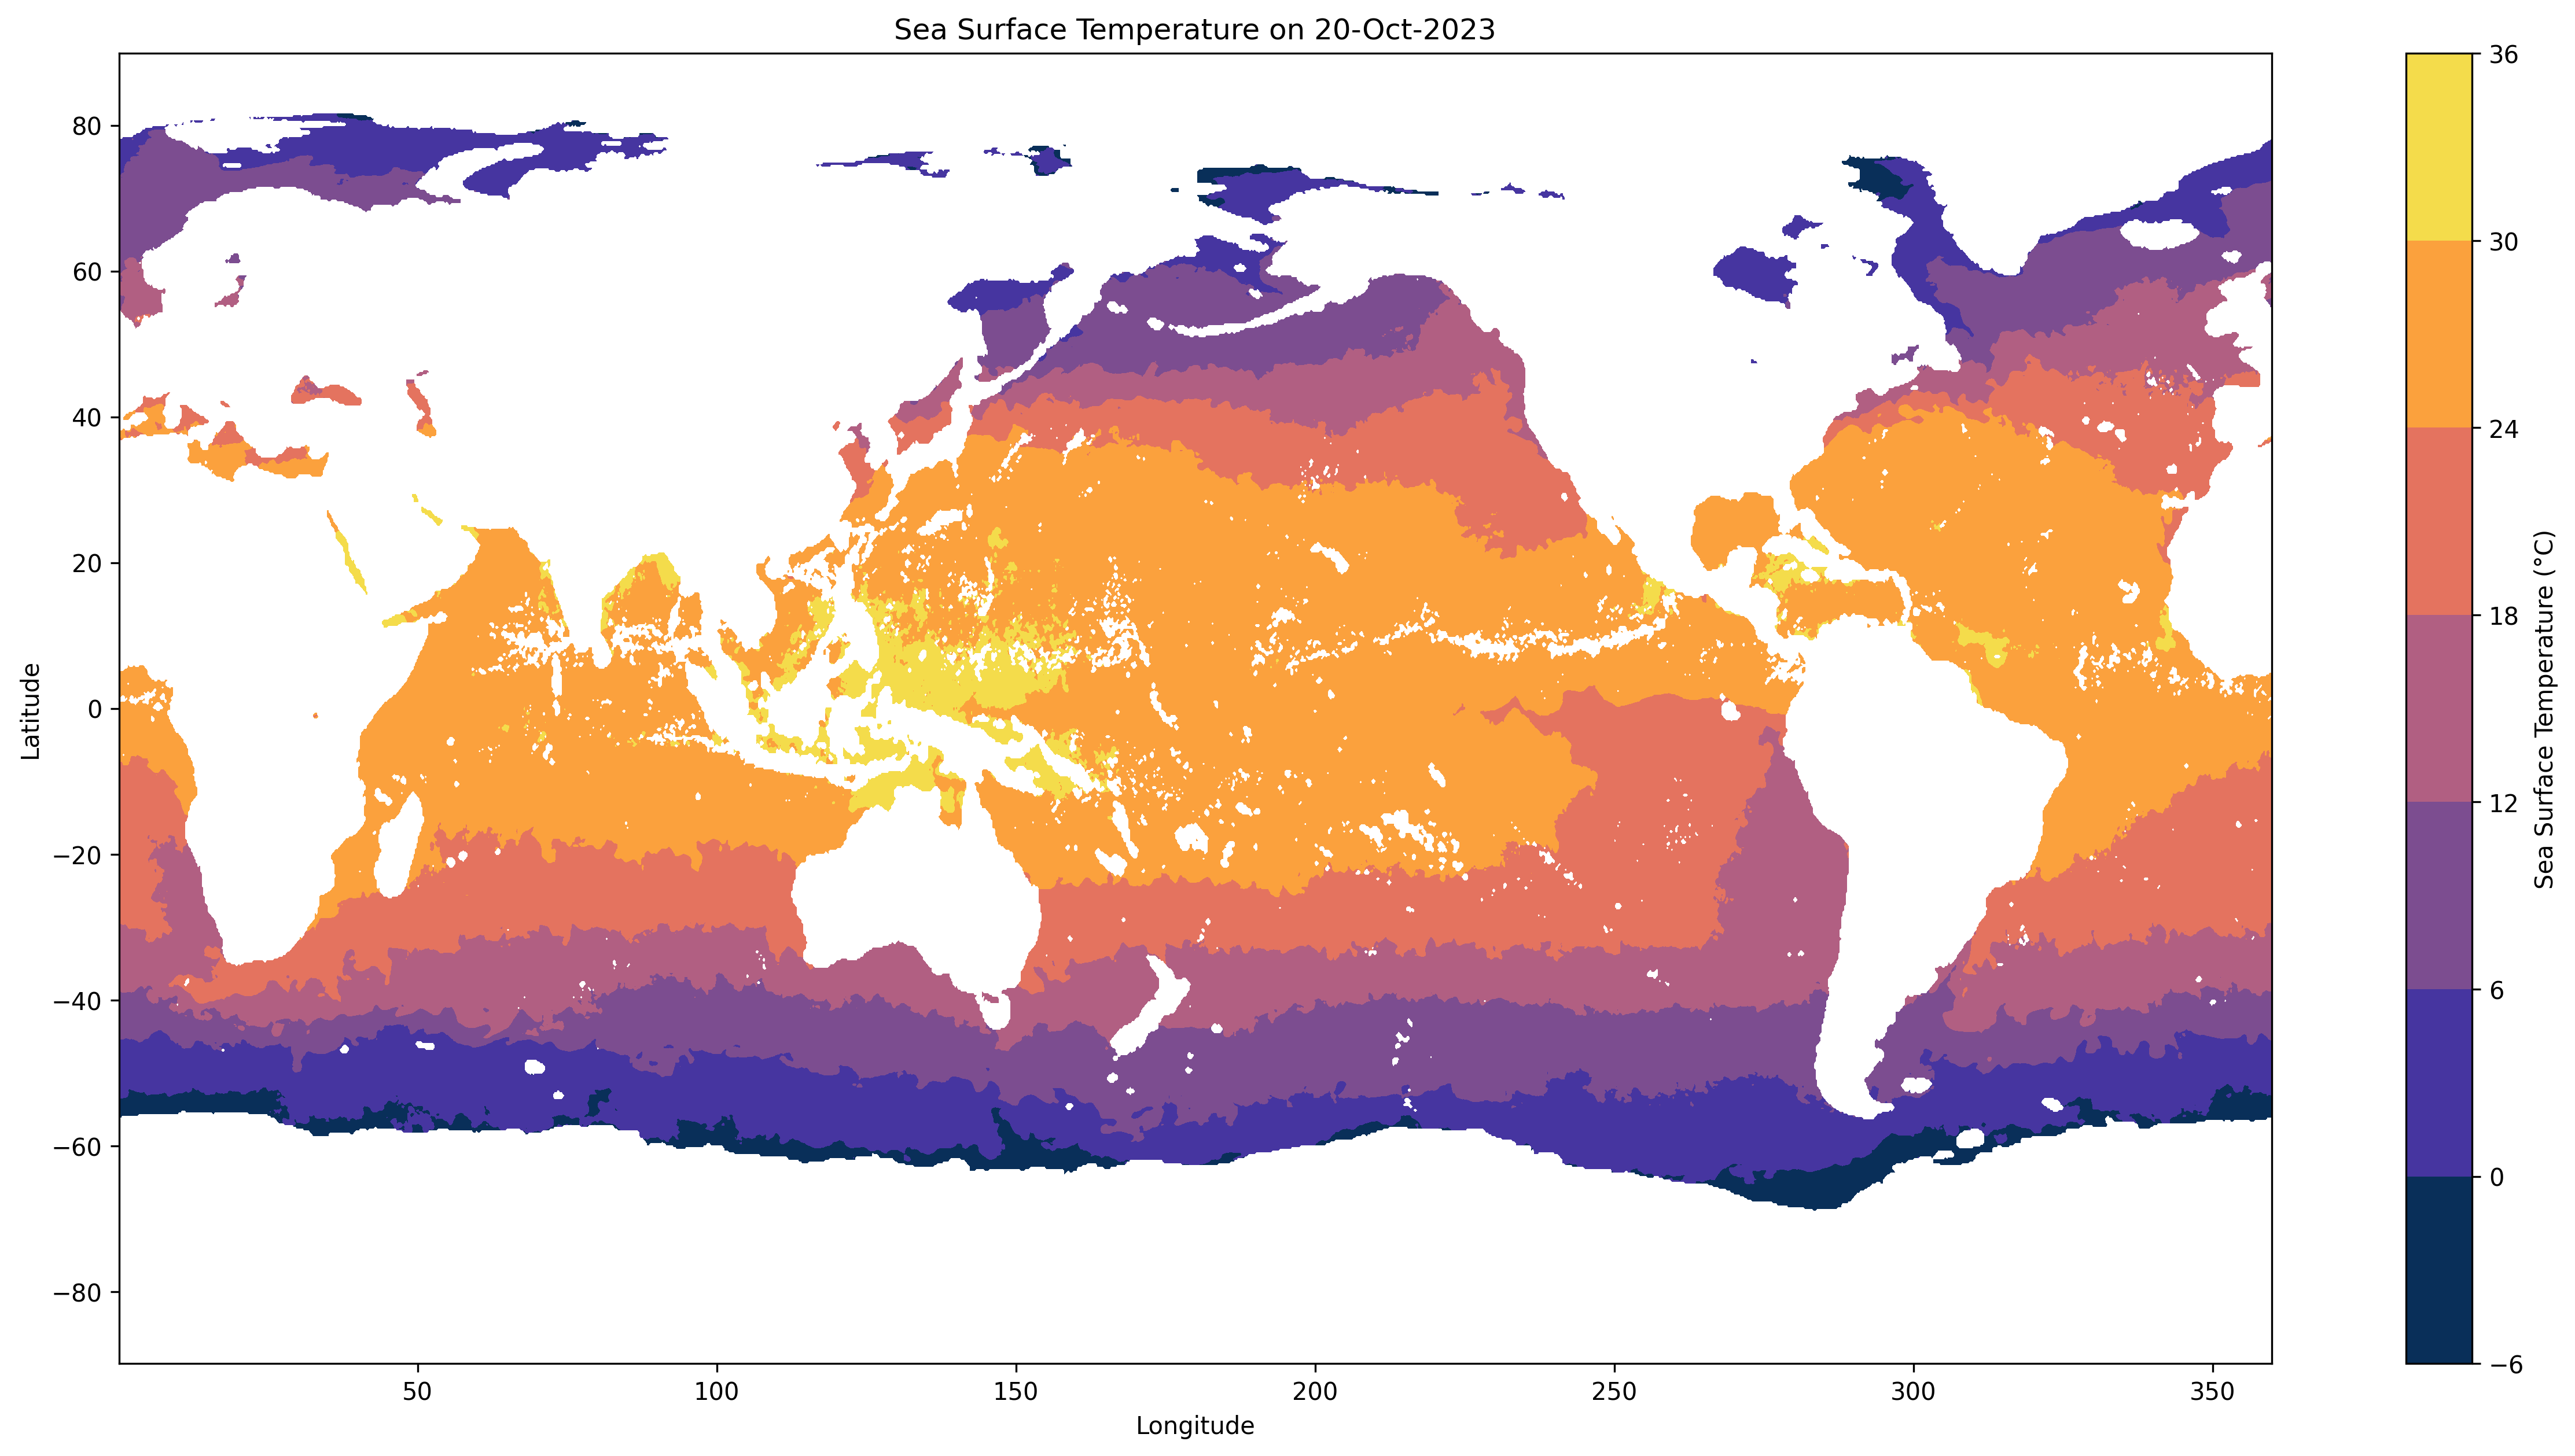

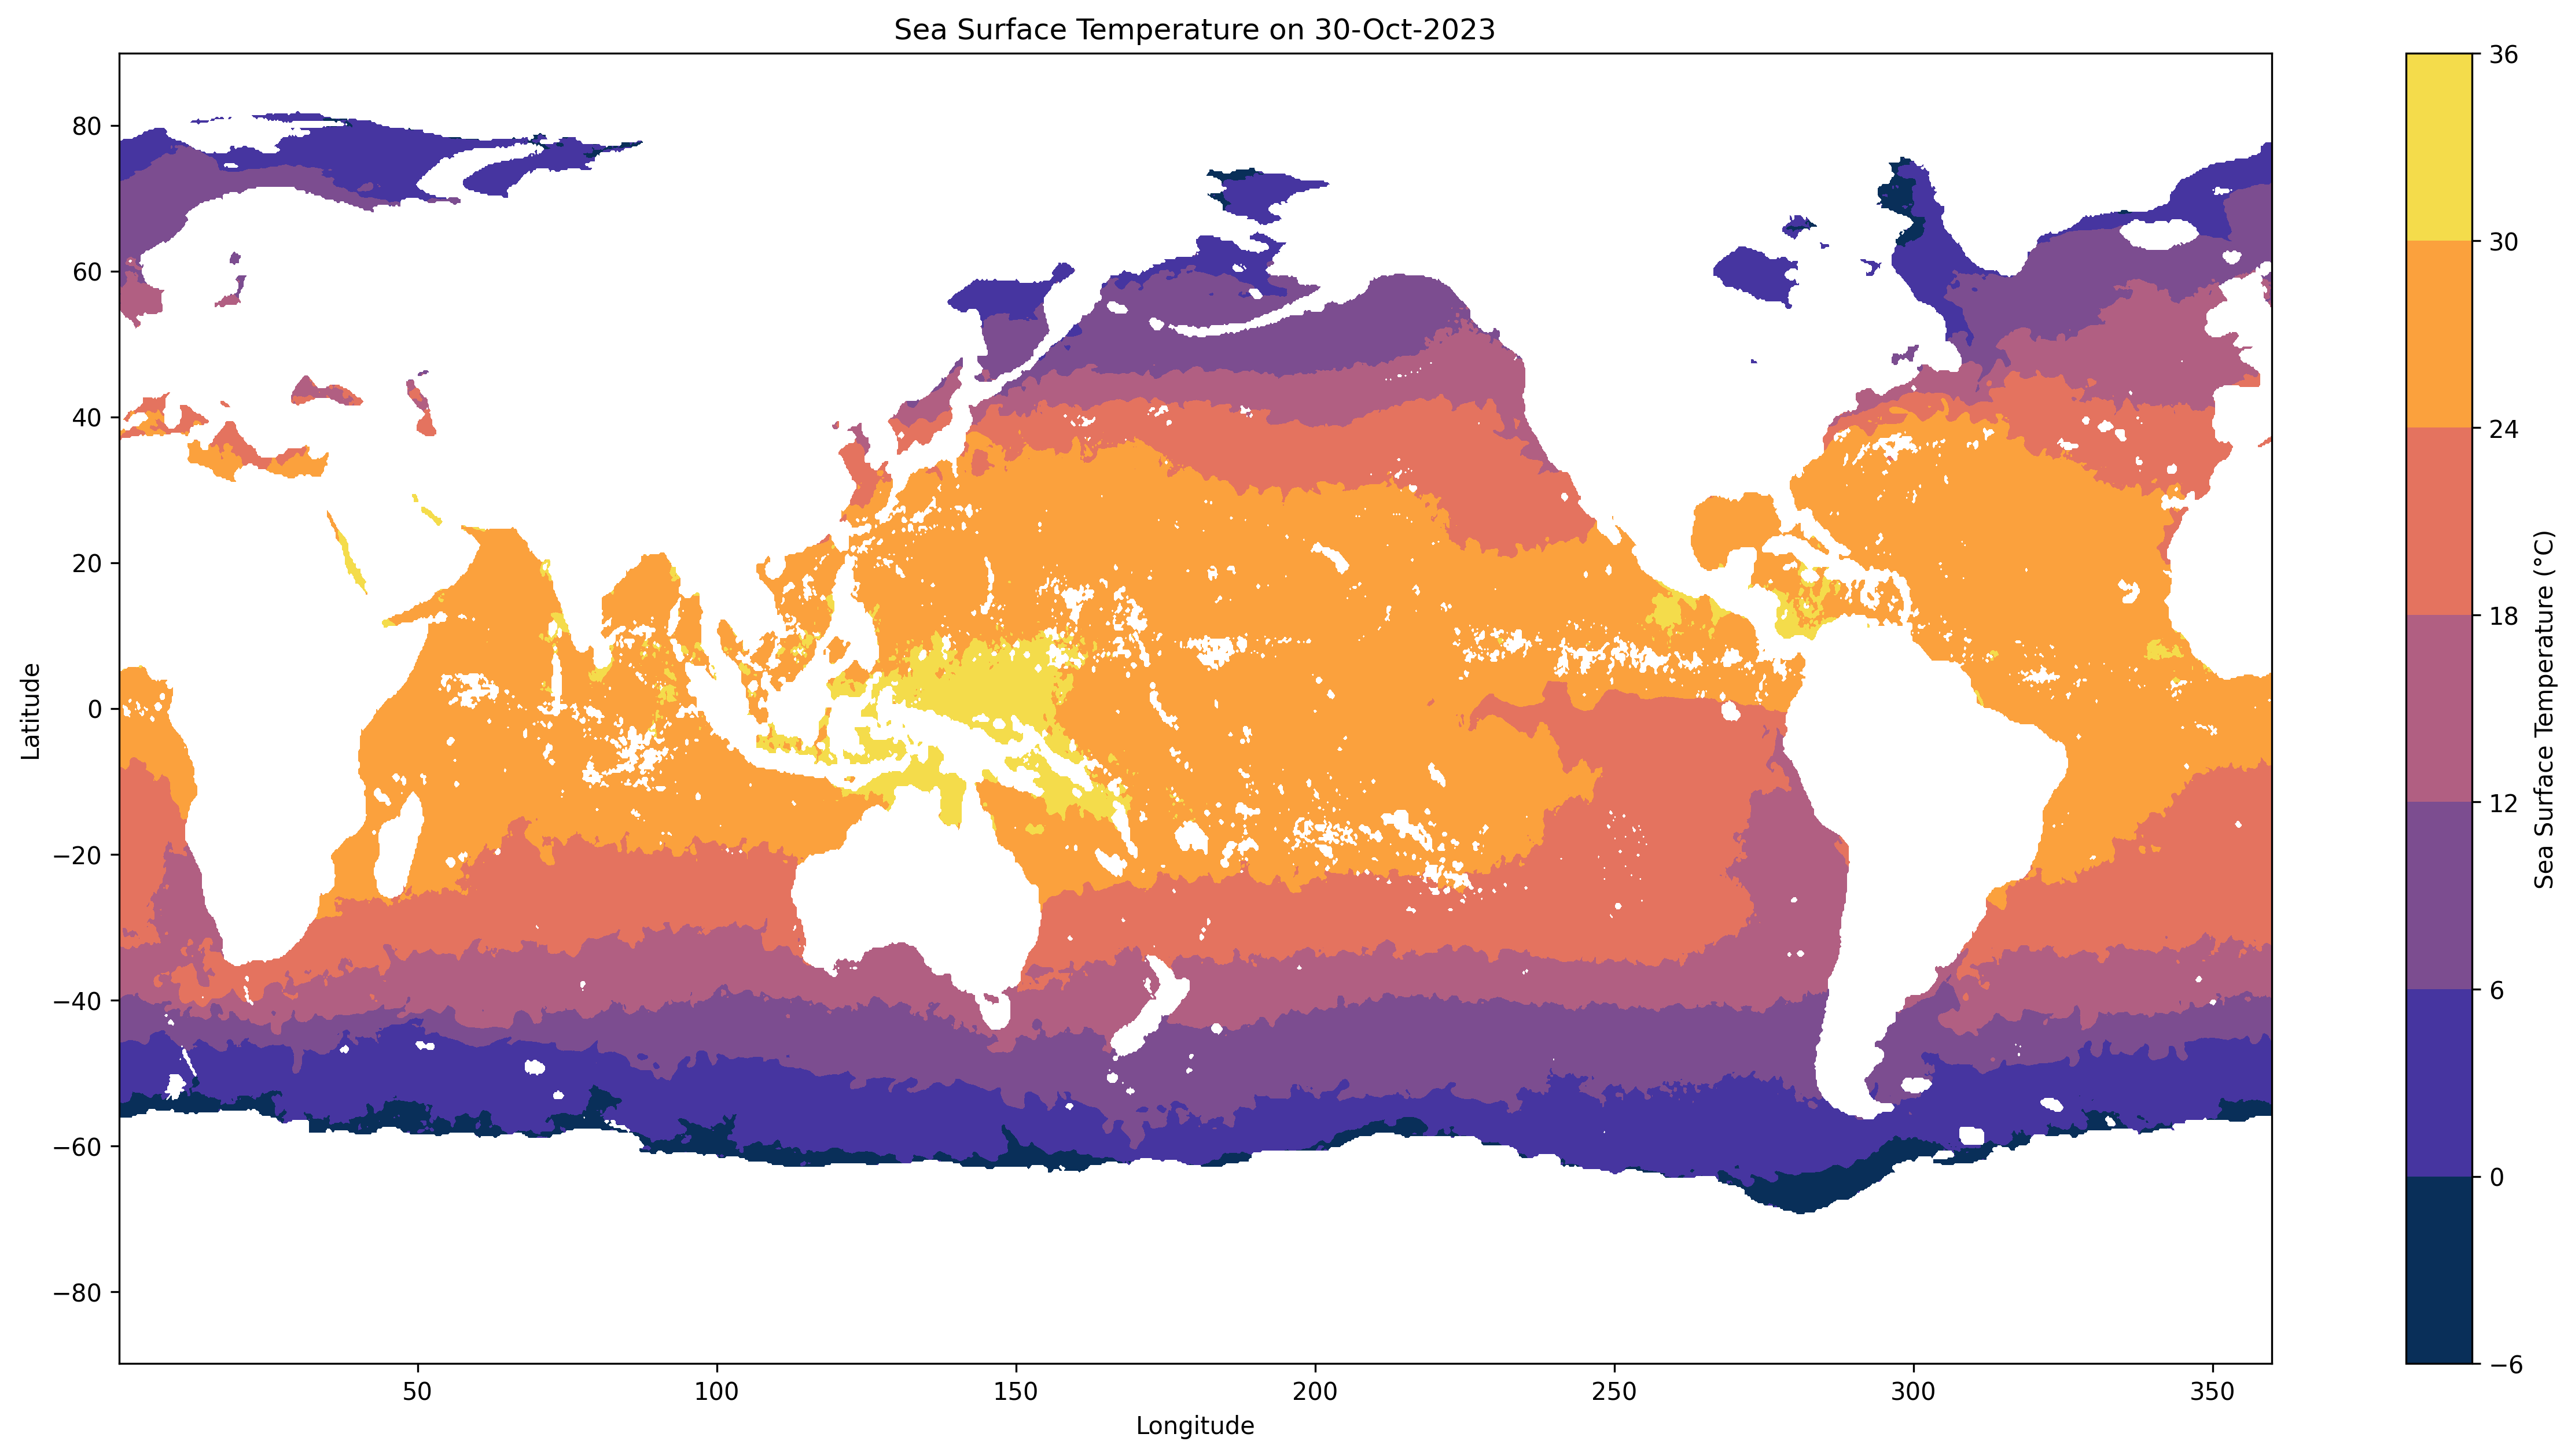

In [55]:
images = []
for filepath, date in zip(filepaths, dates):
    create_contour(filepath, date)
    images.append(imageio.imread(f'plot_{date}.png'))

# Save the GIF
imageio.mimsave('output.gif', images, duration=1)